In [27]:
#!pip install --upgrade pingouin
#!pip install opencv-python

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats
from PIL import Image
import pingouin as pg
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chisquare
from scipy.stats import kstest
from scipy.stats import jarque_bera
import cv2
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import datetime
from sklearn.model_selection import cross_val_score, cross_val_predict, RepeatedKFold 
from sklearn.linear_model import LinearRegression, LogisticRegression
from collections import Counter
import copy
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import sklearn.metrics as me

In [29]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py' --all_tweets True

Starting script...
Removing existing file...
Ending script...


In [30]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')

In [31]:
data.head()

26                   27  \
id_str_twitter                23781146             15148309   
participant_id                       1                    2   
name                      Fe Rebelatto  Sommelier de Airbnb   
screen_name                  rebelatto            Guilh_rm_   
location        Rio de Janeiro, Brasil  somewhere in Brazil   

                                28                                   29  \
id_str_twitter  927028057763995648                             77648005   
participant_id                   3                                 None   
name                     ✪ Felippe  Conference Distinguished Specialist   
screen_name         FelippeRegazio                              NannoKa   
location                                                 Ctba-PR Brasil   

                           30                        31                   32  \
id_str_twitter     3429765093                  10794662  1034514325644431361   
participant_id              4                         5                    6   
name            Paula Santana  Maharaja of the Legacies              Jessica   
screen_name        psanrosa13                    rponte            dev_jessi   
location               Brasil             Ceará, Brazil   São Paulo - Brasil   

                                           33                 34  \
id_str_twitter                      529445600           12050562   
participant_id                           None                  7   
name            var nickname = "Riquettinha";  Roberta Arcoverde   
screen_name                       Riquettinha               rla4   
location               Belo Horizonte, Brasil  Sao Paulo, Brazil   

                             35                       36  \
id_str_twitter         62314491                 18289937   
participant_id                8                     None   
name                   Gabriela          Thamara Andrade   
screen_name     Gabrielathalita                   thamyk   
location         Belo Horizonte  Belo Horizonte, Brazil.   

                                   37                      38  \
id_str_twitter              172880784                18609547   
participant_id                      9                      10   
name                      felipe.ts ⚡              Juan Lopes   
screen_name             felipefialho_              juanplopes   
location        Dark Side of the Moon  Rio de Janeiro, Brasil   

                               39                   40  \
id_str_twitter         2164986296  1026783544457273345   
participant_id                 11                   12   
name                Rafael Dantas          iagor com i   
screen_name        RaffaelDantass              Iagor51   
location        São Paulo, Brasil                  Pvh   

                                           41                      42  \
id_str_twitter                      109604376     1040939562774790144   
participant_id                             13                      14   
name            T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷           Esdras Xavier   
screen_name                    RafaelMansilha          esdras_xavieer   
location            Palmas, Tocantins, Brasil  Jaraguá do Sul, Brasil   

                                                   43                  44  
id_str_twitter                               69734383           119897261  
participant_id                                     15                  16  
name            belle-🏴.dev || twitch.tv/bellesamways      Willian Justen  
screen_name                              bellesamways      Willian_justen  
location                                     Curitiba  Petrópolis, Brasil

In [32]:
def create_tweets_pd(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    tweets_pd.columns = ['id', 'id_str_twitter', "text", "created_at", 'favorite_count', 'retweet_count',
                         'lang',
                         "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "vader_sentiment_analysis_polarity_5_cat",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_polarity_5_cat",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_polarity_5_cat",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_polarity_5_cat",
                         "liwc_sentiment_analysis_score", "liwc_sentiment_analysis_polarity",
                         "liwc_sentiment_analysis_polarity_5_cat",
                         "final_score", "final_score_ensemble", 
                         "final_polarity", "final_polarity_ensemble", 
                         'text_updated', 'is_retweet', 'retweet_updated']
 
    return tweets_pd

In [33]:
count = 1
all_tweets = pd.DataFrame()
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets = create_tweets_pd(data, id_user)
        columns_to_delete = ['id', 'id_str_twitter', "text", 'favorite_count', 'retweet_count', 'lang',
                             #"vader_sentiment_analysis_score", 
                             "vader_sentiment_analysis_polarity",
                             "vader_sentiment_analysis_polarity_5_cat",
                             #"oplexicon_sentiment_analysis_score",
                             "oplexicon_sentiment_analysis_polarity",
                             "oplexicon_sentiment_analysis_polarity_5_cat",
                             #"sentistrength_sentiment_analysis_score",
#                              "sentistrength_sentiment_analysis_polarity",
                             "sentistrength_sentiment_analysis_polarity_5_cat",
                             #"sentilexpt_sentiment_analysis_score",
                             "sentilexpt_sentiment_analysis_polarity",
                             "sentilexpt_sentiment_analysis_polarity_5_cat",
                             #"liwc_sentiment_analysis_score",
                             "liwc_sentiment_analysis_polarity",
                             "liwc_sentiment_analysis_polarity_5_cat",
                             'text_updated', 'is_retweet', 'retweet_updated']

        for c in columns_to_delete:
            del tweets[c]

        tweets['Participant'] = data[id_user]['participant_id']
        if all_tweets.empty:
            all_tweets = tweets
        else:
            all_tweets = all_tweets.append(tweets)
        
        count += 1
    
# print(all_tweets)
#sns.relplot(x="created_at", y="final_score", hue="final_polarity", row="id_user",kind="line", data=all_tweets);

In [34]:
all_tweets.head()

created_at  id_user  vader_sentiment_analysis_score  \
0  2021-03-31T19:13:28       26                         -0.4588   
1  2021-03-31T12:28:56       26                          0.0000   
2  2021-03-31T12:17:06       26                          0.7734   
3  2021-03-31T11:46:04       26                         -0.8720   
4  2021-03-30T17:58:24       26                         -0.6808   

   oplexicon_sentiment_analysis_score  sentistrength_sentiment_analysis_score  \
0                            0.000000                                    0.00   
1                            0.000000                                    0.00   
2                            0.458831                                    0.00   
3                            0.458831                                    0.25   
4                            0.000000                                    0.00   

  sentistrength_sentiment_analysis_polarity  \
0                                       neu   
1                                       neu   
2                                       neu   
3                                       pos   
4                                       neu   

   sentilexpt_sentiment_analysis_score  liwc_sentiment_analysis_score  \
0                                 0.00                         0.0000   
1                                 0.00                        -0.0667   
2                                 0.00                         0.0196   
3                                -0.25                         0.0400   
4                                -0.25                         0.0000   

   final_score  final_score_ensemble final_polarity final_polarity_ensemble  \
0    -0.091760                 0.000            neg                     neu   
1    -0.013340                 0.000            neg                     neu   
2     0.250366                 0.000            pos                     neu   
3    -0.074634                 0.000            neg                     neu   
4    -0.186160                -0.125            neg                     neg   

   Participant  
0            1  
1            1  
2            1  
3            1  
4            1

In [35]:
print(len(all_tweets))

91632


In [36]:
print(all_tweets['id_user'].value_counts())

43    24077
32     9385
37     6456
31     5993
28     5932
26     5038
44     4928
38     4708
27     4548
41     4386
39     3944
30     3171
42     2698
35     2595
40     2228
34     1545
Name: id_user, dtype: int64


In [37]:
for i in all_tweets.index:
    t = all_tweets.iloc[i]
    d = pd.to_datetime(t['created_at']).to_pydatetime()
    date_from = datetime.datetime(year = d.year, month = d.month, day = d.day, hour = 9)
    date_to = datetime.datetime(year = d.year, month = d.month, day = d.day, hour = 18)
    if date_from <= d <= date_to and d.weekday() in [0,1,2,3,4]:
        all_tweets.at[i,'is_work_time'] = int(1)
    else:
        all_tweets.at[i,'is_work_time'] = int(0)

In [38]:
print(all_tweets['is_work_time'].value_counts())

0.0    46430
1.0    45202
Name: is_work_time, dtype: int64


In [39]:
def create_line_plot(tweets, id_user, count):
    fig, ax = plt.subplots(figsize=(30, 12))

    tweets["created_at"] = pd.to_datetime(tweets["created_at"])
    tweets['date_minus_time'] = tweets["created_at"].apply(lambda tweets : datetime.datetime(year=tweets.year, month=tweets.month, day=tweets.day))
    tweets.set_index(tweets["date_minus_time"],inplace=True)

    new_df = pd.DataFrame(tweets['sentistrength_sentiment_analysis_score'].resample('D').mean())

    x = new_df.index
    y = new_df['sentistrength_sentiment_analysis_score']

    ran = range(0, len(x), 15)

    x_ticks = new_df.index[ran]

    plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=18)
    plt.xticks(x_ticks, rotation='vertical', fontsize=18)

    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.xlabel('Day', fontsize=16)
    plt.ylabel('Polarity Score', fontsize=16)

    plt.title("Tweets polarity per day - Participant {} - User {}".format(count, id_user), fontsize=30, pad = 20)
    plt.ylabel("Polarity", fontsize=26, labelpad = 10)
    plt.xlabel("Days", fontsize=26, labelpad = 10)

    # plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    # min_ylim, max_ylim = plt.ylim()
    # plt.text(y.mean()*0.05, max_ylim*0.12, 'Mean: {:.2f}'.format(y.mean()))

    plt.margins(x=0.02)
    plt.tight_layout()
    plt.plot(x,y)

In [40]:
print(len(all_tweets.index))

91632


In [41]:
all_tweets.query('Participant == 6')

created_at  id_user  vader_sentiment_analysis_score  \
0     2021-03-31T23:34:40       32                          0.1984   
1     2021-03-31T23:34:32       32                          0.4767   
2     2021-03-31T23:32:16       32                          0.0000   
3     2021-03-31T21:17:37       32                          0.7783   
4     2021-03-31T14:07:44       32                         -0.4215   
...                   ...      ...                             ...   
9380  2020-10-12T18:08:35       32                          0.5346   
9381  2020-09-20T07:41:43       32                          0.7543   
9382  2020-10-19T10:21:54       32                         -0.1280   
9383  2020-10-19T18:35:36       32                         -0.2263   
9384  2020-09-19T22:02:25       32                          0.0000   

      oplexicon_sentiment_analysis_score  \
0                              -0.458831   
1                               0.170000   
2                              -0.093500   
3                               0.126800   
4                               0.000000   
...                                  ...   
9380                            0.000000   
9381                            0.000000   
9382                            0.250000   
9383                            0.176800   
9384                            0.328000   

      sentistrength_sentiment_analysis_score  \
0                                     0.0000   
1                                     0.1075   
2                                    -0.0935   
3                                     0.1768   
4                                    -0.2500   
...                                      ...   
9380                                  0.0000   
9381                                  0.2500   
9382                                  0.2500   
9383                                  0.1768   
9384                                  0.3280   

     sentistrength_sentiment_analysis_polarity  \
0                                          neu   
1                                          pos   
2                                          neg   
3                                          pos   
4                                          neg   
...                                        ...   
9380                                       neu   
9381                                       pos   
9382                                       pos   
9383                                       pos   
9384                                       pos   

      sentilexpt_sentiment_analysis_score  liwc_sentiment_analysis_score  \
0                                  0.0000                         0.0217   
1                                  0.0450                         0.0263   
2                                  0.1565                         0.0000   
3                                  0.1268                         0.0000   
4                                  0.0000                         0.0000   
...                                   ...                            ...   
9380                              -0.2500                         0.0454   
9381                               0.0000                         0.0556   
9382                               0.0000                         0.0000   
9383                               0.1768                         0.0000   
9384                               0.3280                         0.0000   

      final_score  final_score_ensemble final_polarity  \
0       -0.047746               0.00000            neg   
1        0.165100               0.07625            pos   
2       -0.006100               0.03150            neg   
3        0.241740               0.15180            pos   
4       -0.134300              -0.12500            neg   
...           ...                   ...            ...   
9380     0.066000              -0.12500            pos   
9381     0.211980               0.12500            pos   
9382     0.074400               

In [42]:
tweets = create_tweets_pd(data, 26)
columns_to_delete = ['id', 'id_str_twitter', "text", 'favorite_count', 'retweet_count', 'lang', "id_user",
                     "vader_sentiment_analysis_score",
                     "vader_sentiment_analysis_polarity",
                     "vader_sentiment_analysis_polarity_5_cat",
                    "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                     "oplexicon_sentiment_analysis_polarity_5_cat",
                    #"sentistrength_sentiment_analysis_score", 
#                      "sentistrength_sentiment_analysis_polarity",
                     "sentistrength_sentiment_analysis_polarity_5_cat",
                    "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                     "sentilexpt_sentiment_analysis_polarity_5_cat",
                     "liwc_sentiment_analysis_score", "liwc_sentiment_analysis_polarity",
                     "liwc_sentiment_analysis_polarity_5_cat",
                    'text_updated', 'is_retweet', 'retweet_updated']

for c in columns_to_delete:
    del tweets[c]
    
tweets.head()

created_at  sentistrength_sentiment_analysis_score  \
0  2021-03-31T19:13:28                                    0.00   
1  2021-03-31T12:28:56                                    0.00   
2  2021-03-31T12:17:06                                    0.00   
3  2021-03-31T11:46:04                                    0.25   
4  2021-03-30T17:58:24                                    0.00   

  sentistrength_sentiment_analysis_polarity  final_score  \
0                                       neu    -0.091760   
1                                       neu    -0.013340   
2                                       neu     0.250366   
3                                       pos    -0.074634   
4                                       neu    -0.186160   

   final_score_ensemble final_polarity final_polarity_ensemble  
0                 0.000            neg                     neu  
1                 0.000            neg                     neu  
2                 0.000            pos                     neu  
3                 0.000            neg                     neu  
4                -0.125            neg                     neg

In [43]:
all_tweets

created_at  id_user  vader_sentiment_analysis_score  \
0     2021-03-31T19:13:28       26                         -0.4588   
1     2021-03-31T12:28:56       26                          0.0000   
2     2021-03-31T12:17:06       26                          0.7734   
3     2021-03-31T11:46:04       26                         -0.8720   
4     2021-03-30T17:58:24       26                         -0.6808   
...                   ...      ...                             ...   
4923  2020-08-17T19:09:02       44                          0.4939   
4924  2020-07-31T19:43:02       44                          0.3612   
4925  2020-10-08T20:29:24       44                          0.6114   
4926  2020-12-30T22:22:26       44                          0.4199   
4927  2021-02-11T18:21:29       44                          0.3382   

      oplexicon_sentiment_analysis_score  \
0                               0.000000   
1                               0.000000   
2                               0.458831   
3                               0.458831   
4                               0.000000   
...                                  ...   
4923                            0.000000   
4924                            0.000000   
4925                            0.000000   
4926                            0.329000   
4927                            0.454000   

      sentistrength_sentiment_analysis_score  \
0                                      0.000   
1                                      0.000   
2                                      0.000   
3                                      0.250   
4                                      0.000   
...                                      ...   
4923                                   0.250   
4924                                   0.250   
4925                                   0.250   
4926                                   0.329   
4927                                   0.329   

     sentistrength_sentiment_analysis_polarity  \
0                                          neu   
1                                          neu   
2                                          neu   
3                                          pos   
4                                          neu   
...                                        ...   
4923                                       pos   
4924                                       pos   
4925                                       pos   
4926                                       pos   
4927                                       pos   

      sentilexpt_sentiment_analysis_score  liwc_sentiment_analysis_score  \
0                                   0.000                         0.0000   
1                                   0.000                        -0.0667   
2                                   0.000                         0.0196   
3                                  -0.250                         0.0400   
4                                  -0.250                         0.0000   
...                                   ...                            ...   
4923                                0.000                         0.2000   
4924                                0.000                         0.0000   
4925                                0.250                        -0.0625   
4926                                0.329                         0.0000   
4927                                0.204                        -0.0625   

      final_score  final_score_ensemble final_polarity  \
0       -0.091760                0.0000            neg   
1       -0.013340                0.0000            neg   
2        0.250366                0.0000            pos   
3       -0.074634                0.0000            neg   
4       -0.186160               -0.1250            neg   
...           ...                   ...            ...   
4923     0.188780                0.1250            pos   
4924     0.122240                0.1250            pos   
4925     0.209780               

In [44]:
def create_boxplot_chart_data(tweets, is_percent):
    bar_chart_data = []

    df_grouped = tweets.groupby(['Participant'])
    for i in range(1,len(df_grouped)+1):
        t = tweets.query('Participant == {}'.format(i))

        if is_percent == True:
            d = ['P{}'.format(t['Participant'].iloc[0]),
                 (len(t.query("final_polarity_ensemble == 'pos'")) / len(t)) * 100,
                 (len(t.query("final_polarity_ensemble == 'neu'")) / len(t)) * 100,
                 (len(t.query("final_polarity_ensemble == 'neg'")) / len(t)) * 100
                ]
        else:
            d = ['P{}'.format(t['Participant'].iloc[0]), 
                 len(t.query("final_polarity_ensemble == 'pos'")),
                 len(t.query("final_polarity_ensemble == 'neu'")), 
                 len(t.query("final_polarity_ensemble == 'neg'"))]
        bar_chart_data.append(d)

    if is_percent == True:
        df = pd.DataFrame(bar_chart_data, columns=["Participant","por_pos","por_neu","por_neg"])
    else:
        df = pd.DataFrame(bar_chart_data, columns=["Participant","pos","neu","neg"])
    return df

   Participant    por_pos    por_neu    por_neg
0           P1  27.947598  37.038507  35.013894
1           P2  30.057168  42.348285  27.594547
2           P3  33.175995  34.238031  32.585974
3           P4  54.210028  26.237780  19.552192
4           P5  49.941599  24.078091  25.980310
5           P6  46.734150  28.694726  24.571124
6           P7  44.854369  29.708738  25.436893
7           P8  34.489403  37.572254  27.938343
8           P9  50.108426  29.306072  20.585502
9          P10  34.961767  28.377230  36.661003
10         P11  42.824544  34.203854  22.971602
11         P12  22.845601  51.840215  25.314183
12         P13  27.633379  41.860465  30.506156
13         P14  22.979985  44.255004  32.765011
14         P15  29.584251  37.284545  33.131204
15         P16  48.315747  28.368506  23.315747


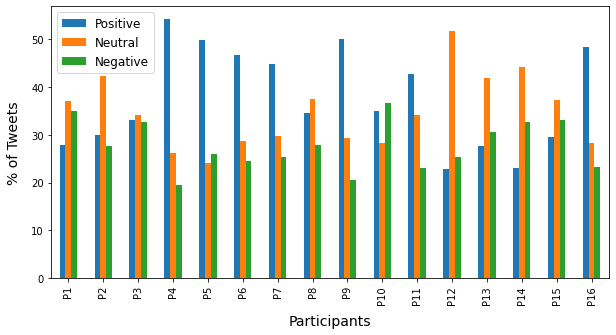

Mean por_pos: 37.541500596220104
Mean por_neu: 34.71326902377344
Mean por_neg: 27.745230380006454


In [45]:
# multiple bar plots

df = create_boxplot_chart_data(all_tweets, True)
print(df)
# y_range = range(0,6001, 500)
df.plot(x="Participant", y=["por_pos", "por_neu", "por_neg"], kind="bar",figsize=(10,5))

plt.legend(["Positive", "Neutral", "Negative"], fontsize=12)
# plt.title('Tweets Polarity', fontsize=16, pad=10)
plt.xlabel('Participants', fontsize=14, labelpad=10)
plt.ylabel('% of Tweets', fontsize=14, labelpad=10)
# plt.grid(True)

plt.show()

print('Mean por_pos:',np.mean(df['por_pos']))
print('Mean por_neu:',np.mean(df['por_neu']))
print('Mean por_neg:',np.mean(df['por_neg']))

In [46]:
df.describe()

por_pos    por_neu    por_neg
count  16.000000  16.000000  16.000000
mean   37.541501  34.713269  27.745230
std    10.469287   7.616992   5.182475
min    22.845601  24.078091  19.552192
25%    29.175087  28.615352  24.257280
50%    34.725585  34.220942  26.787429
75%    47.129549  38.644307  32.630734
max    54.210028  51.840215  36.661003

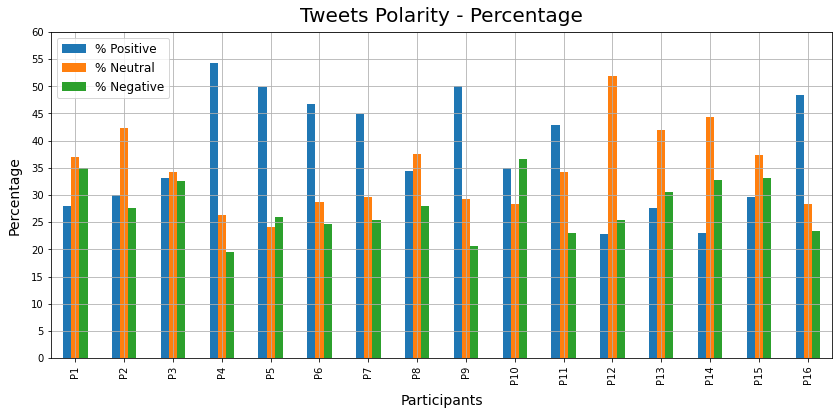

In [49]:
# multiple line plots

df = create_boxplot_chart_data(all_tweets, True)

y_range = range(0, 61, 5)
# df.head()
df.plot(yticks = y_range, x="Participant", y=["por_pos", "por_neu", "por_neg"], kind="bar",figsize=(14,6))


plt.legend(['% Positive', '% Neutral', '% Negative'], fontsize=12)
plt.title('Tweets Polarity - Percentage', fontsize=20, pad=10)
plt.xlabel('Participants', fontsize=14, labelpad=10)
plt.ylabel('Percentage', fontsize=14, labelpad=10)
plt.grid(True)

plt.show()

In [166]:
def plot_point_chart(df, id_user):

    first_date = df.iloc[0]['date_minus_time']
    
    for i in range(1,13):
        end_date = first_date + relativedelta(months=+3)
        mask = (df['created_at'] >= first_date) & (df['created_at'] < end_date)
        new_df = df.loc[mask]
        
        fig, ax = plt.subplots(figsize=(22, 3))
    
        x = new_df['date_minus_time']
        y = new_df['final_score_ensemble']

        x_ticks = x

        colors = {'pos':'green', 'neu':'orange', 'neg':'tomato'}

        plt.yticks(np.arange(-1.0, 1.1, 0.2), fontsize=14)
        plt.xticks(x_ticks, rotation='vertical', fontsize=14)

        date_form = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_form)
        plt.xlabel('Day', fontsize=16, labelpad=10)
        plt.ylabel('Polarity Score', fontsize=16, labelpad=10)
        
        plt.title('Participant {} - From {} To {}'.format(df['Participant'].iloc[0], 
                                                          first_date.strftime("%Y-%m-%d"), 
                                                          end_date.strftime("%Y-%m-%d")), 
                  fontsize=16, pad=10)
        
        plt.rcParams.update({
            "savefig.facecolor": (1.0, 1.0, 1.0)
        })
        
#         plt.legend()

        plt.scatter(x, y, alpha=0.7, c=new_df['final_polarity_ensemble'].map(colors))
        
#         plt.savefig('images/scatter_P{}_U{}_{}_{}.pdf'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")),bbox_inches='tight',transparent=False)
        
        first_date = end_date

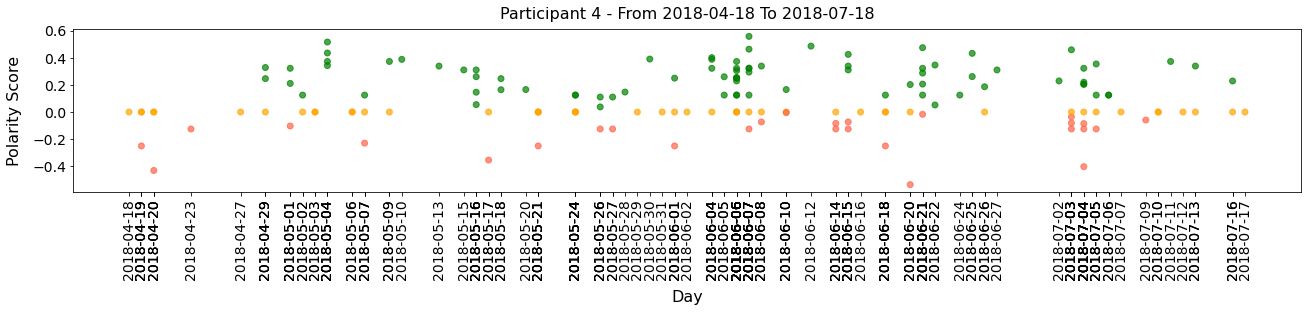

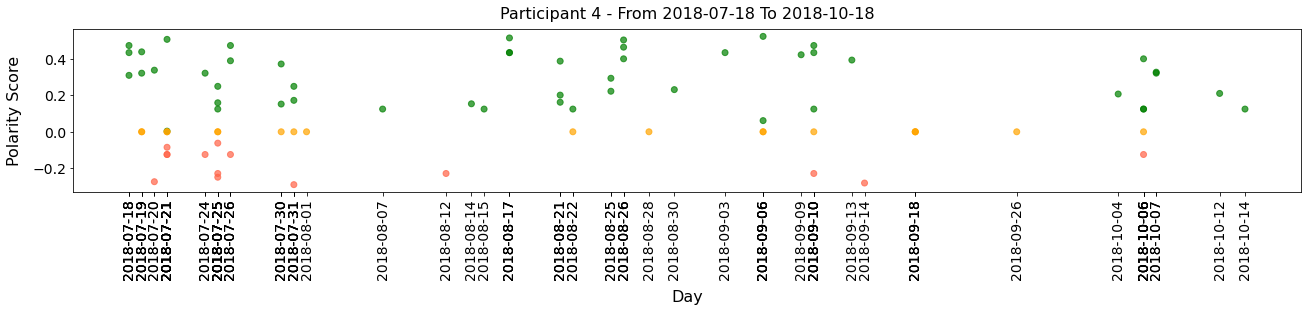

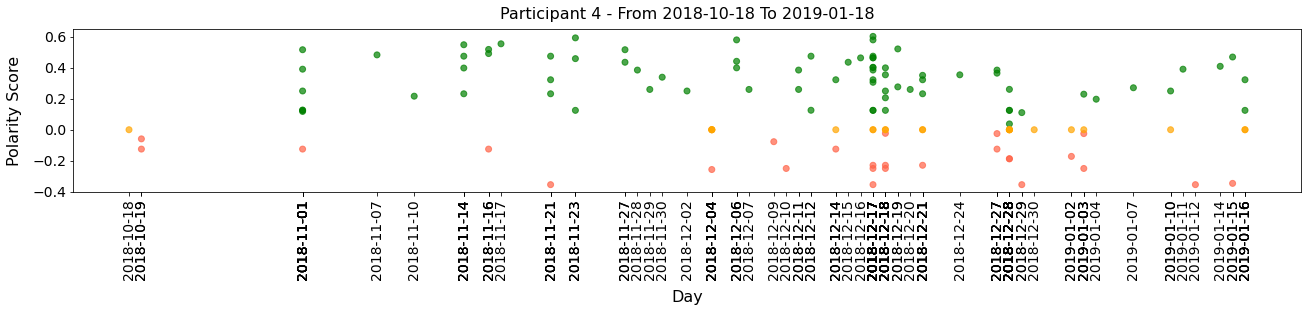

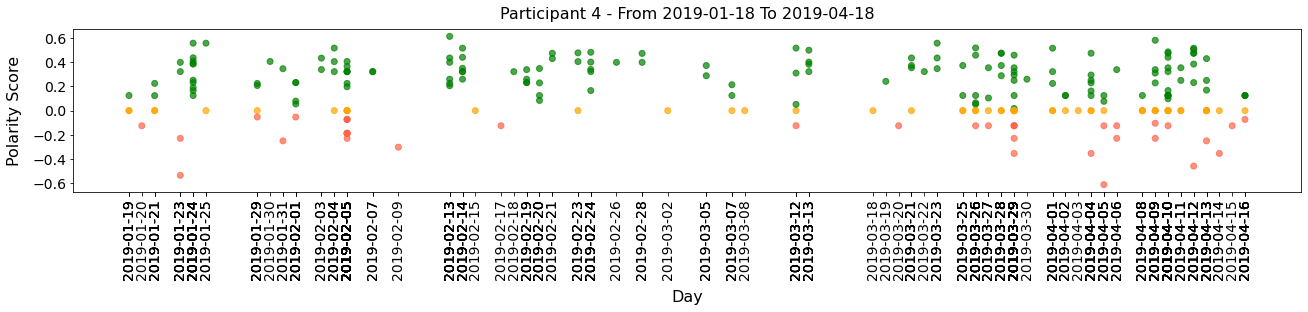

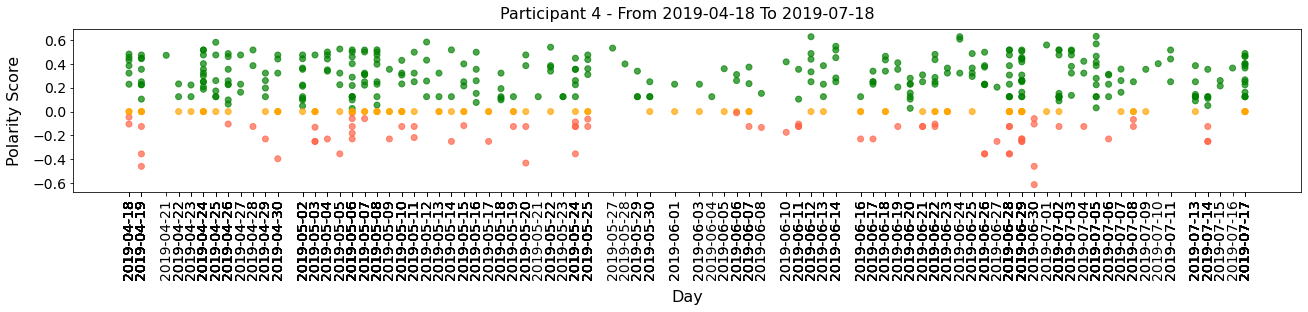

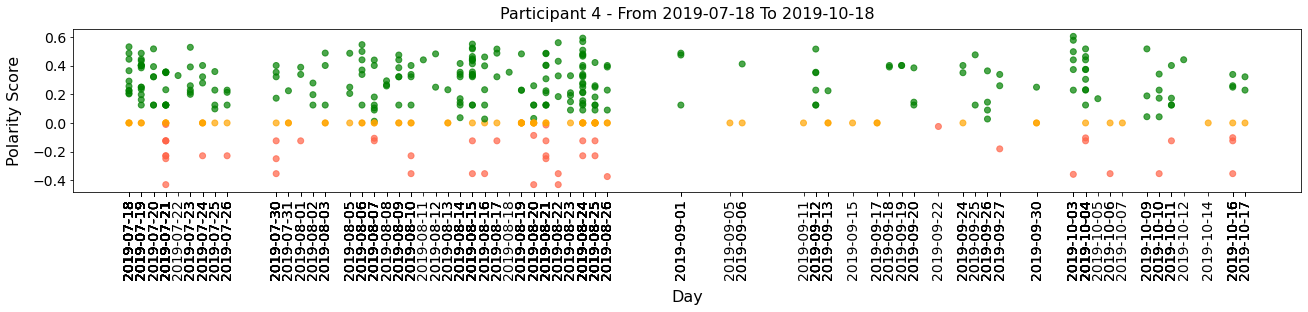

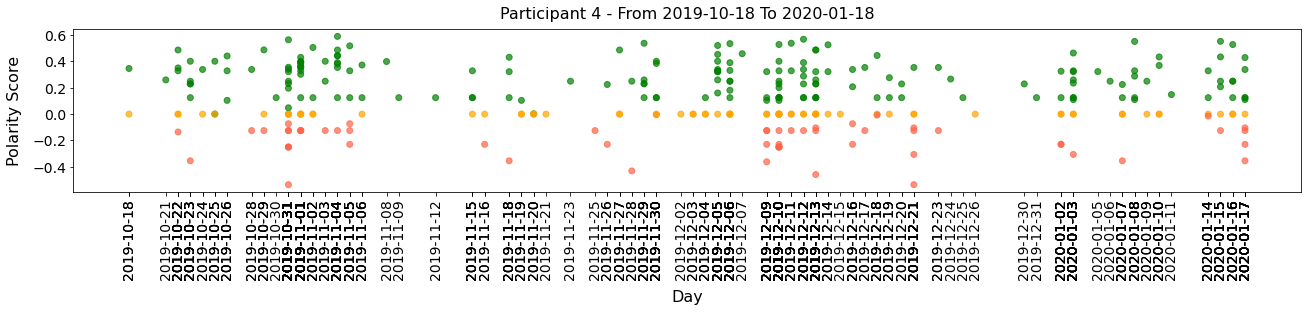

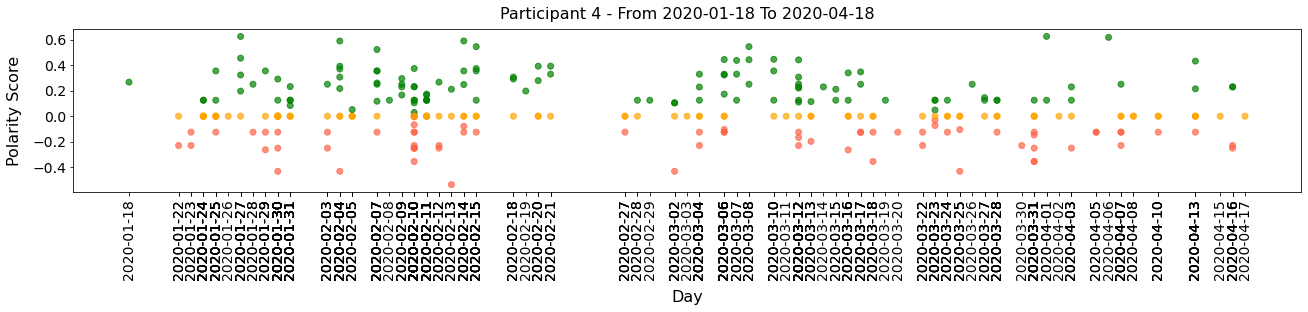

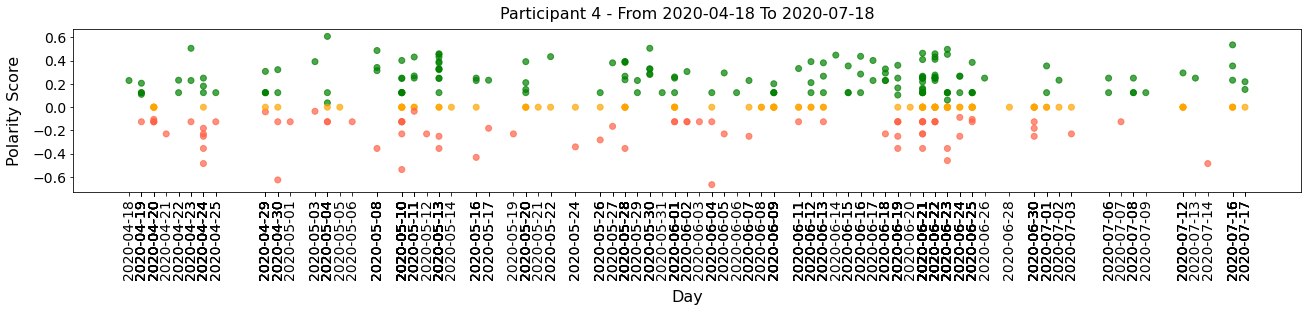

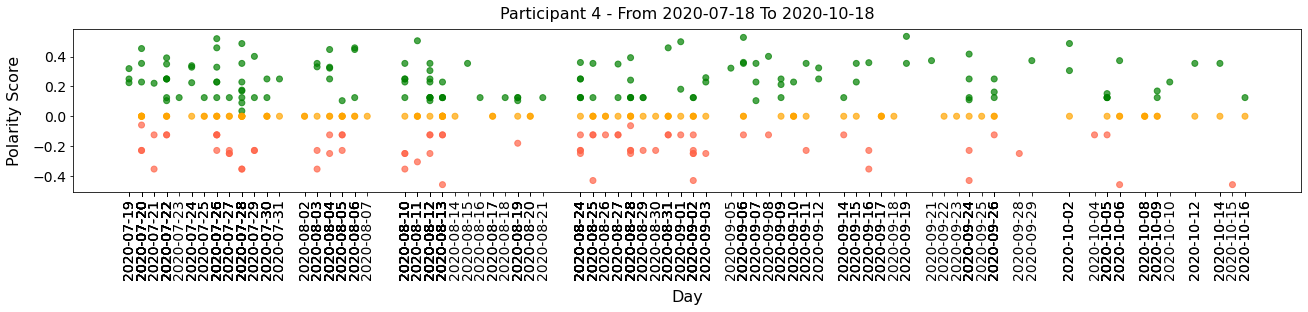

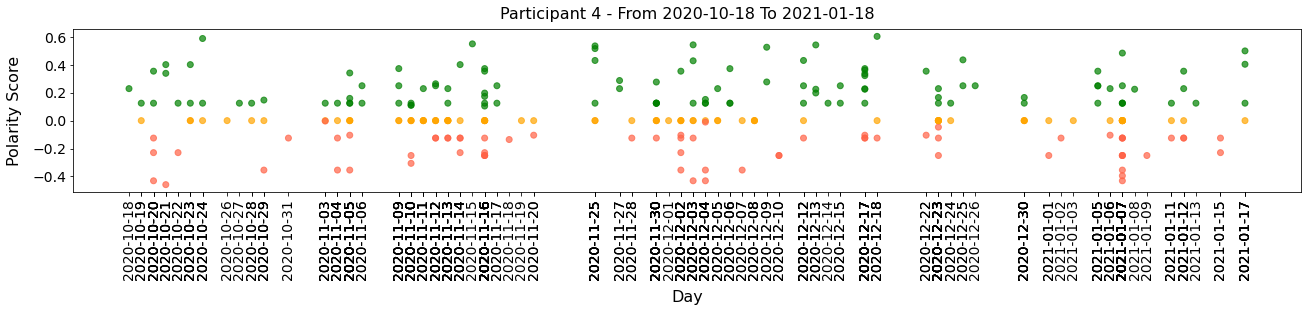

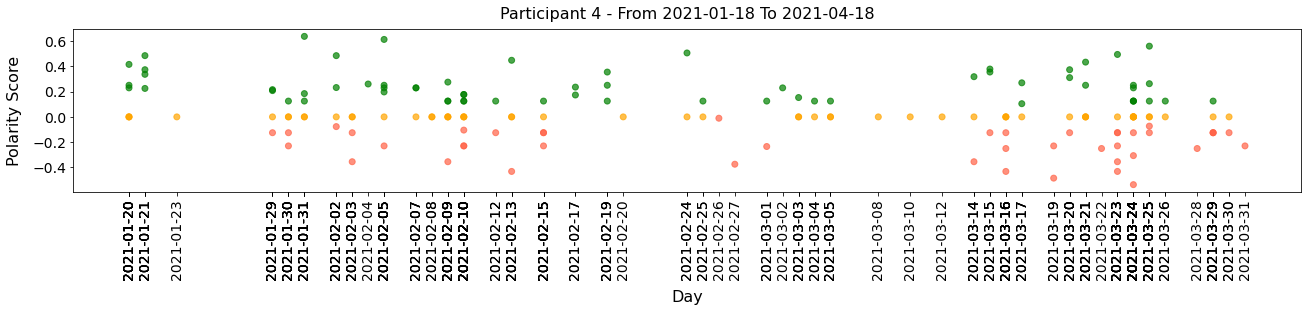

In [168]:
df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    t = all_tweets.query('Participant == {}'.format(i))
    id_user = t['id_user'].iloc[0]

    del t['vader_sentiment_analysis_score']
    del t['oplexicon_sentiment_analysis_score']
    del t['sentistrength_sentiment_analysis_score']
    del t['sentilexpt_sentiment_analysis_score']
    del t['liwc_sentiment_analysis_score']
    
    t = t.sort_values(by='created_at')

    t["created_at"] = pd.to_datetime(t["created_at"])
    t['date_minus_time'] = t["created_at"].apply(lambda t : datetime.datetime(year=t.year,
                                                                              month=t.month,
                                                                              day=t.day))
#     df.set_index(df["date_minus_time"],inplace=True)

    if i == 4:
        plot_point_chart(t, id_user)


In [60]:
all_tweets.query('Participant == 6')

created_at  id_user  vader_sentiment_analysis_score  \
0     2021-03-31T23:34:40       32                          0.1984   
1     2021-03-31T23:34:32       32                          0.4767   
2     2021-03-31T23:32:16       32                          0.0000   
3     2021-03-31T21:17:37       32                          0.7783   
4     2021-03-31T14:07:44       32                         -0.4215   
...                   ...      ...                             ...   
9380  2020-10-12T18:08:35       32                          0.5346   
9381  2020-09-20T07:41:43       32                          0.7543   
9382  2020-10-19T10:21:54       32                         -0.1280   
9383  2020-10-19T18:35:36       32                         -0.2263   
9384  2020-09-19T22:02:25       32                          0.0000   

      oplexicon_sentiment_analysis_score  \
0                              -0.458831   
1                               0.170000   
2                              -0.093500   
3                               0.126800   
4                               0.000000   
...                                  ...   
9380                            0.000000   
9381                            0.000000   
9382                            0.250000   
9383                            0.176800   
9384                            0.328000   

      sentistrength_sentiment_analysis_score  \
0                                     0.0000   
1                                     0.1075   
2                                    -0.0935   
3                                     0.1768   
4                                    -0.2500   
...                                      ...   
9380                                  0.0000   
9381                                  0.2500   
9382                                  0.2500   
9383                                  0.1768   
9384                                  0.3280   

     sentistrength_sentiment_analysis_polarity  \
0                                          neu   
1                                          pos   
2                                          neg   
3                                          pos   
4                                          neg   
...                                        ...   
9380                                       neu   
9381                                       pos   
9382                                       pos   
9383                                       pos   
9384                                       pos   

      sentilexpt_sentiment_analysis_score  liwc_sentiment_analysis_score  \
0                                  0.0000                         0.0217   
1                                  0.0450                         0.0263   
2                                  0.1565                         0.0000   
3                                  0.1268                         0.0000   
4                                  0.0000                         0.0000   
...                                   ...                            ...   
9380                              -0.2500                         0.0454   
9381                               0.0000                         0.0556   
9382                               0.0000                         0.0000   
9383                               0.1768                         0.0000   
9384                               0.3280                         0.0000   

      final_score  final_score_ensemble final_polarity  \
0       -0.047746               0.00000            neg   
1        0.165100               0.07625            pos   
2       -0.006100               0.03150            neg   
3        0.241740               0.15180            pos   
4       -0.134300              -0.12500            neg   
...           ...                   ...            ...   
9380     0.066000              -0.12500            pos   
9381     0.211980               0.12500            pos   
9382     0.074400               

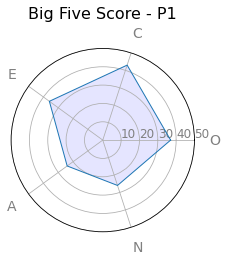

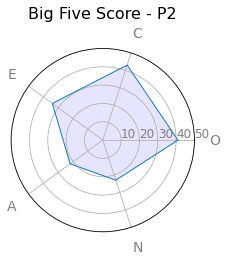

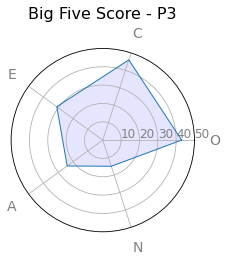

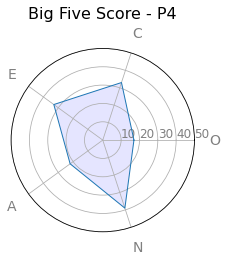

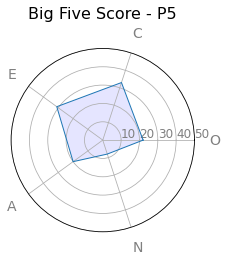

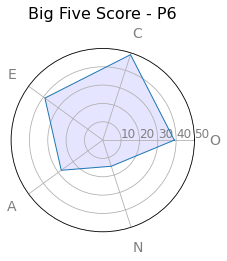

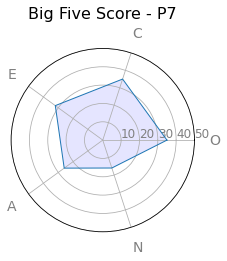

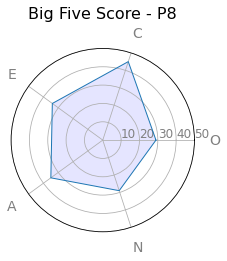

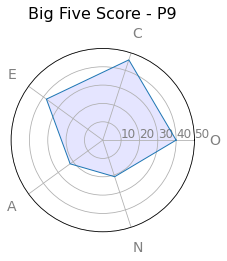

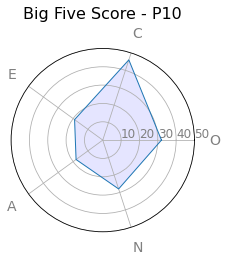

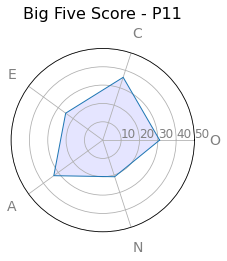

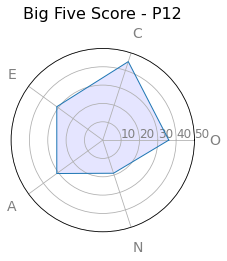

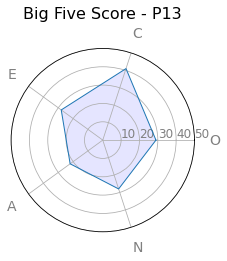

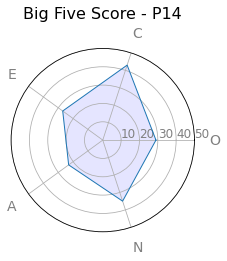

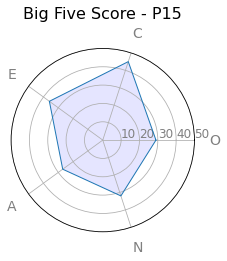

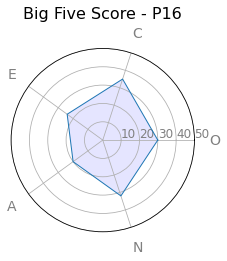

In [61]:
count = 1

for d in data:
    if data[d]['bigfive']:
        b = pd.DataFrame(data[d]['bigfive'])
        b.columns = ['id', 'O', 'C', 'E', 'A', 'N', 'id_user']
        o = b['O']
        c = b['C']
        e = b['E']
        a = b['A']
        n = b['N']
        
        df = pd.DataFrame({
        'group': ['A'],
        'O': o,
        'C': c,
        'E': e,
        'A': a,
        'N': n
        })
        
        # number of variable
        categories=list(df)[1:]
        N = len(categories)

        # We are going to plot the first line of the data frame.
        # But we need to repeat the first value to close the circular graph:
        values=df.loc[0].drop('group').values.flatten().tolist()
        values += values[:1]

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]


        fig = plt.figure(figsize=(6, 6))
        gs = GridSpec(nrows=1, ncols=2)

        # Initialise the spider plot
        ax = fig.add_subplot(gs[0, 0])
        ax = plt.subplot(121, polar=True)

        # Draw one axe per variable + add labels
        plt.xticks(angles[:-1], categories, color='grey', size=14)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([10,20,30, 40, 50], ["10","20","30", '40', '50'], color="grey", size=12)
        plt.ylim(0,50)
        
        ax.tick_params(pad=10)

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid')

        # Fill area
        ax.fill(angles, values, 'b', alpha=0.1)

        plt.title('Big Five Score - P{}'.format(data[d]['participant_id']), fontsize=16, pad = 30)

        plt.tight_layout()

#         Show the graph
        plt.show()
        
#         fig.savefig('images/polar_ocean_p{}_u{}.png'.format(count, d), bbox_inches='tight')

        count += 1

In [62]:
def show_images(images, cols = 1, rows = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure(figsize = (3,6))
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(rows, cols, n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        plt.axis('off')
#         a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

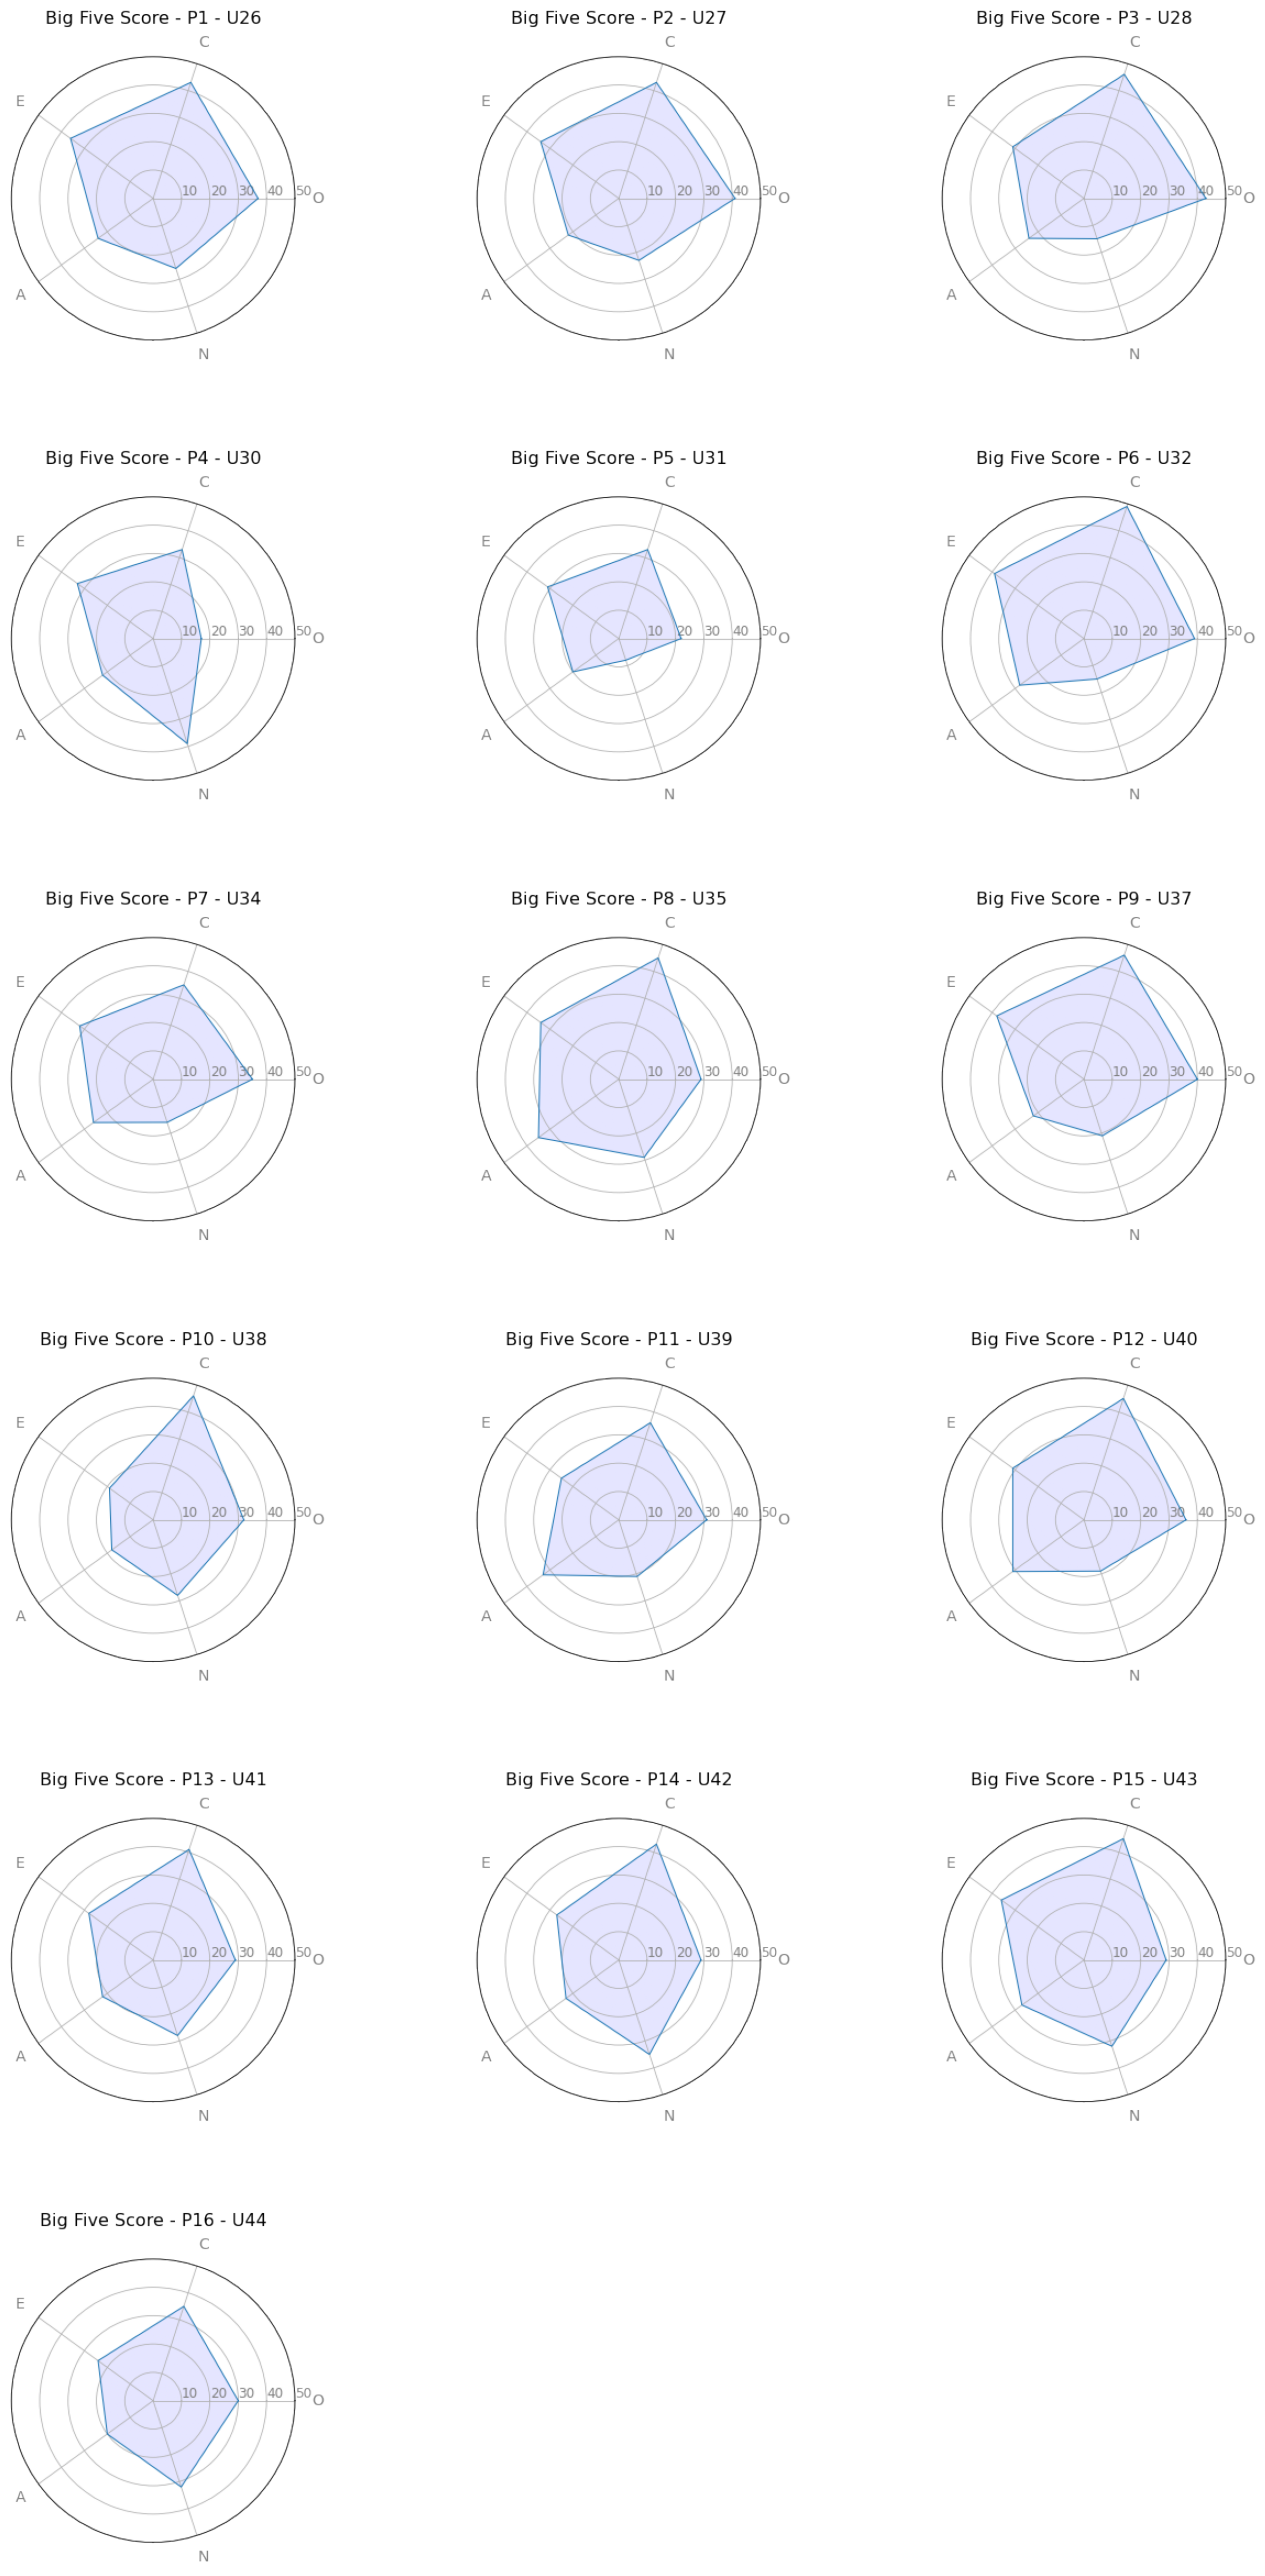

In [63]:
count = 1
images_list = []

for d in data:
    if data[d]['bigfive']:
        image = plt.imread('images/polar_ocean_p{}_u{}.png'.format(count, d))
        images_list.append(image)
        count += 1
        
show_images(np.array(images_list), cols=3, rows=6)

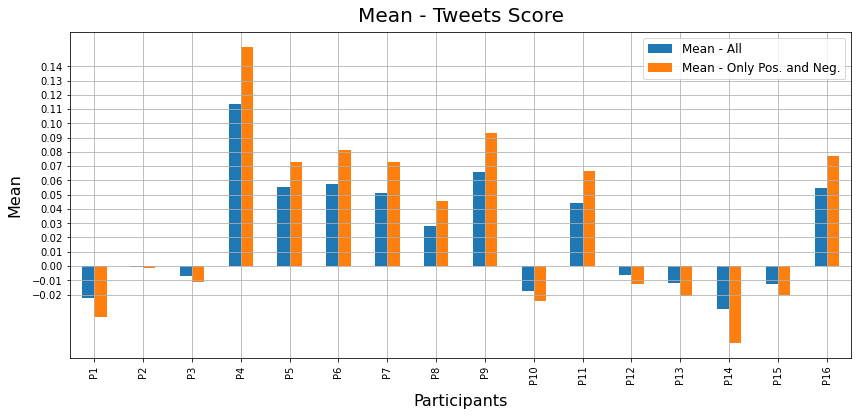

In [64]:
# multiple bar plots with means

bar_chart_data = []

y_range = np.arange(-0.02, 0.15, 0.01) 

count = 1
df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    t = all_tweets.query('Participant == {}'.format(i))

    d = ['P{}'.format(count),
         t['final_score_ensemble'].mean(),
         t.query("final_polarity_ensemble != 'neu'")['final_score_ensemble'].mean()
        ]

    bar_chart_data.append(d)
    count += 1

df = pd.DataFrame(bar_chart_data, columns=["Participant","mean_all","mean_posneg"])
df.plot(yticks = y_range, x="Participant", y=["mean_all", "mean_posneg"], kind="bar",figsize=(14,6))

plt.legend(["Mean - All", "Mean - Only Pos. and Neg."], fontsize=12)
plt.title('Mean - Tweets Score', fontsize=20, pad=10)
plt.xlabel('Participants', fontsize=16, labelpad=10)
plt.ylabel('Mean', fontsize=16, labelpad=10)
plt.grid(True)

plt.show()

In [65]:
count = 1
json_data = {
    'Participant': [],
    'Id User': [],
    'O': [],
    'C': [],
    'E': [],
    'A': [],
    'N': []
}

for d in data:
    if data[d]['bigfive']:
        b = pd.DataFrame(data[d]['bigfive'])
        b.columns = ['id', 'O', 'C', 'E', 'A', 'N', 'Id User']
        b['Participant'] = count
        del b['id']
        b = b[['Participant', 'Id User', 'O', 'C', 'E', 'A', 'N']]
        json_data['Participant'].append(b['Participant'][0])
        json_data['Id User'].append(b['Id User'][0])
        json_data['O'].append(b['O'][0])
        json_data['C'].append(b['C'][0])
        json_data['E'].append(b['E'][0])
        json_data['A'].append(b['A'][0])
        json_data['N'].append(b['N'][0])
        count += 1
        
bf = pd.DataFrame(json_data)

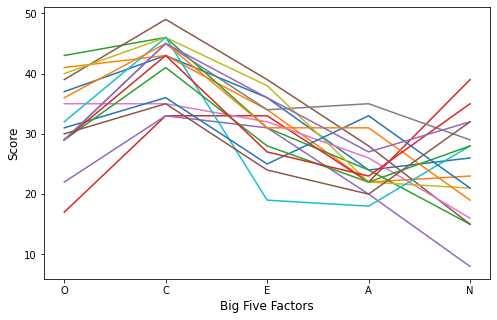

In [66]:
fig = plt.figure(figsize=(8,5))

x = ['O', 'C', 'E', 'A', 'N']
y = [
    bf['O'],
    bf['C'],
    bf['E'],
    bf['A'],
    bf['N'],
]

# plt.xticks(ticks = tickvalues ,labels = x, rotation = 'vertical')

# plt.title("Big Five", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Big Five Factors", fontsize=12)

# plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
# min_ylim, max_ylim = plt.ylim()
# plt.text(y.mean()*0.05, max_ylim*1.1, 'Mean: {:.2f}'.format(y.mean()))

plt.plot(x, y)

fig.savefig('images/line_chart_bigfive.png', bbox_inches='tight')

       Participant   Id User          O          C          E          A  \
count    16.000000  16.00000  16.000000  16.000000  16.000000  16.000000   
mean      8.500000  35.43750  32.437500  41.500000  31.125000  24.812500   
std       4.760952   5.92136   6.966288   5.291503   5.414487   4.860984   
min       1.000000  26.00000  17.000000  33.000000  19.000000  18.000000   
25%       4.750000  30.75000  29.000000  35.750000  27.750000  22.000000   
50%       8.500000  36.00000  31.500000  43.000000  31.500000  23.500000   
75%      12.250000  40.25000  37.500000  45.250000  34.500000  27.250000   
max      16.000000  44.00000  43.000000  49.000000  39.000000  35.000000   

               N  
count  16.000000  
mean   24.187500  
std     8.408081  
min     8.000000  
25%    18.250000  
50%    24.500000  
75%    29.750000  
max    39.000000  


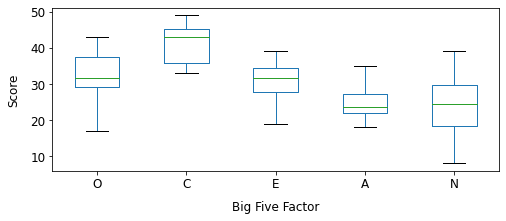

In [67]:
bplot = bf.boxplot(column=['O', 'C', 'E', 'A', 'N'], grid=False, figsize=(8,3))
# y_range = range(0,4501, 500)

# bplot.axes.set_title("Big Five Factor Score", fontsize=14, pad = 10)
 
bplot.set_xlabel("Big Five Factor", fontsize=12, labelpad=10)
bplot.set_ylabel("Score", fontsize=12, labelpad=10)
# bplot.set_yticks(y_range)
bplot.tick_params(labelsize=12)
bplot.set_xticklabels(['O', 'C', 'E', 'A', 'N'])

print(bf.describe())

[Text(1, 0, 'Positive'), Text(2, 0, 'Negative'), Text(3, 0, 'Neutral')]

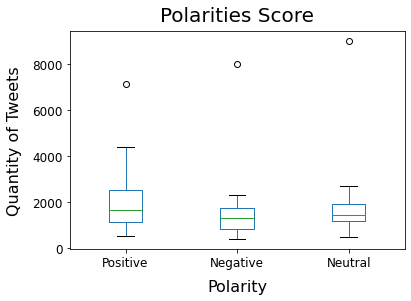

In [68]:
df = create_boxplot_chart_data(all_tweets, False)

bplot = df.boxplot(column=['pos', 'neg', 'neu'], grid=False, figsize=(6,4))
# y_range = range(0,4501, 500)

bplot.axes.set_title("Polarities Score", fontsize=20, pad = 10)
 
bplot.set_xlabel("Polarity", fontsize=16, labelpad=10) 
bplot.set_ylabel("Quantity of Tweets", fontsize=16, labelpad=10)
# bplot.set_yticks(y_range)
bplot.tick_params(labelsize=12)
bplot.set_xticklabels(['Positive', 'Negative', 'Neutral'])

[Text(1, 0, 'Positive (%)'),
 Text(2, 0, 'Negative (%)'),
 Text(3, 0, 'Neutral (%)')]

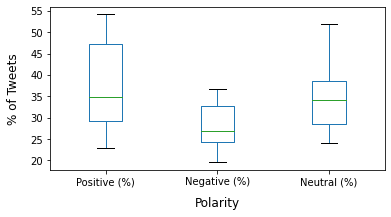

In [69]:
df = create_boxplot_chart_data(all_tweets, True)

bplot = df.boxplot(column=['por_pos', 'por_neg', 'por_neu'], grid=False, figsize=(6,3))
# y_range = range(0, 71, 10)

# bplot.axes.set_title("Polarities Score (%)", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=12, labelpad=10)
bplot.set_ylabel("% of Tweets", fontsize=12, labelpad=10)
# bplot.set_yticks(y_range)
# bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive (%)', 'Negative (%)', 'Neutral (%)'])

In [70]:
def create_line_plot(df_result, id_user, count):

    x = df_result["YearMonth"]
    y = df_result["text"]

    tickvalues = range(0,len(x))

    fig = plt.figure(figsize=(14,3.5))

    plt.xticks(ticks = tickvalues ,labels = x, rotation = 'vertical')

    plt.title("Quantity Tweets per Month - P{} - U{}".format(count, id_user))
    plt.ylabel("Quantity of Tweets", fontsize=12)
    plt.xlabel("Months", fontsize=12)

    plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*0.05, max_ylim*1.1, 'Mean: {:.2f}'.format(y.mean()))

    plt.plot(x,y)

In [71]:
def create_histogram(df_result, id_user, count):

    x = df_result["YearMonth"]
    y = df_result["text"]
    
    fig = plt.figure(figsize=(15,3.5))

    n, bins, patches = plt.hist(y, bins='auto', color='#5643fd')

    plt.xticks(np.arange(0, 1000, 50))

    plt.axvline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(y.mean()))

    plt.title('Tweets Frequency per Month - P{} - U{}'.format(count, id_user))
    plt.xlabel('Quantity of Tweets')
    plt.ylabel('Frequency')

    plt.show()

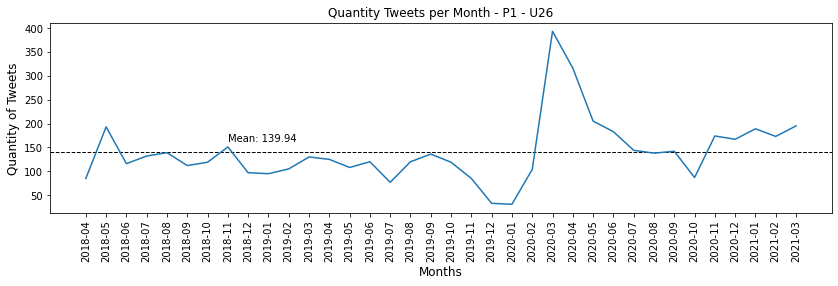

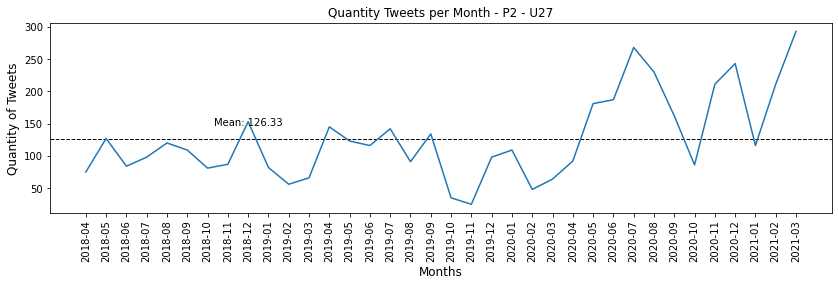

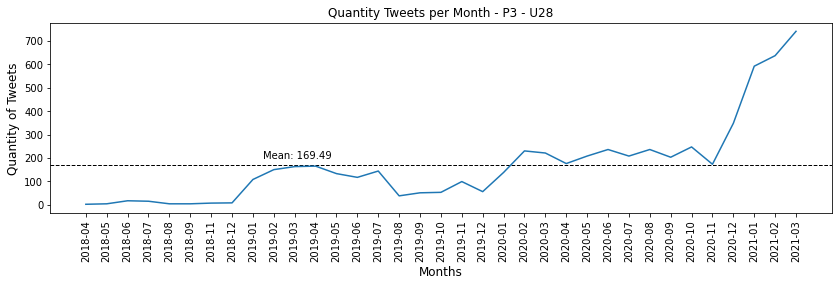

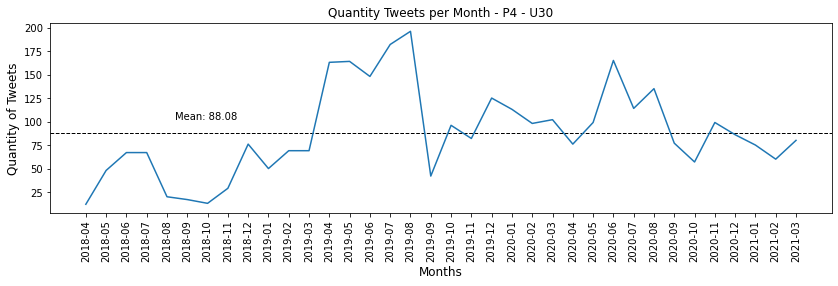

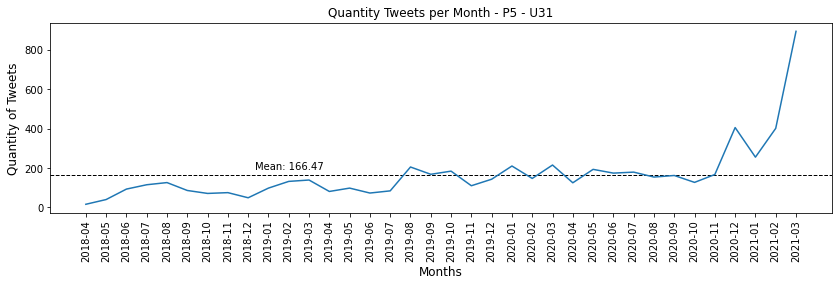

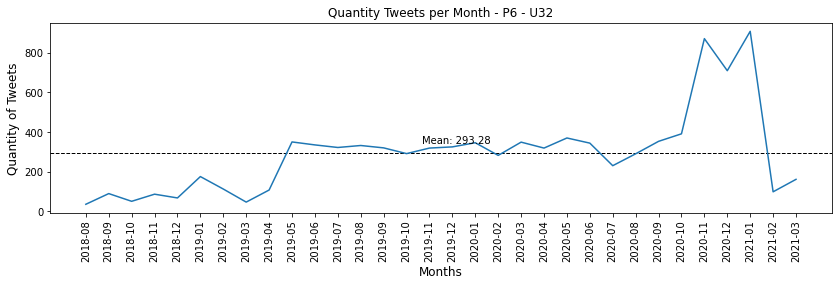

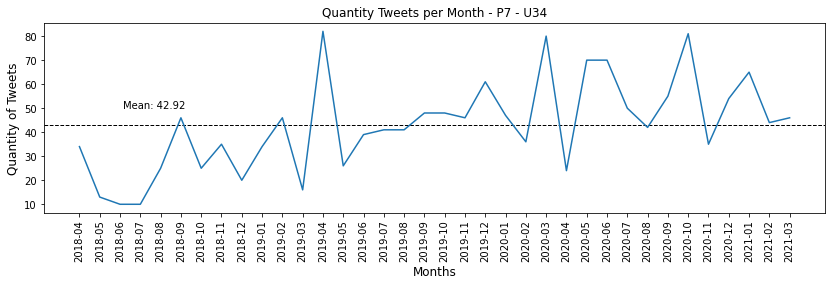

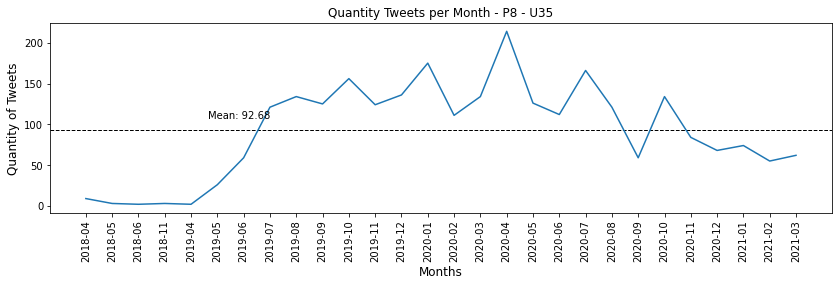

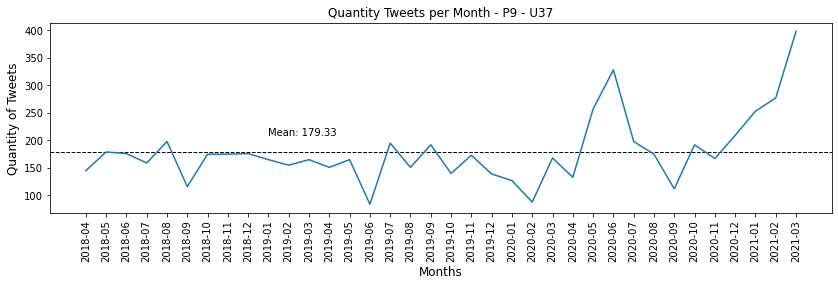

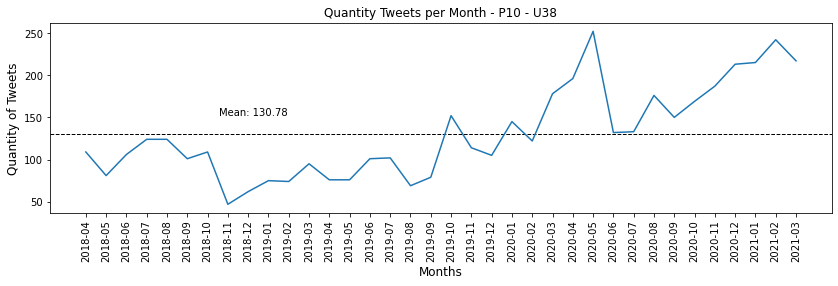

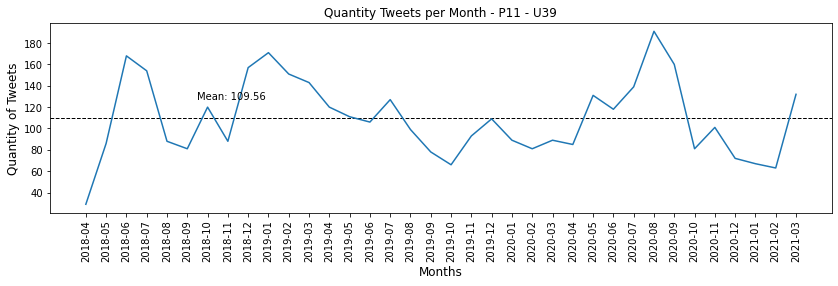

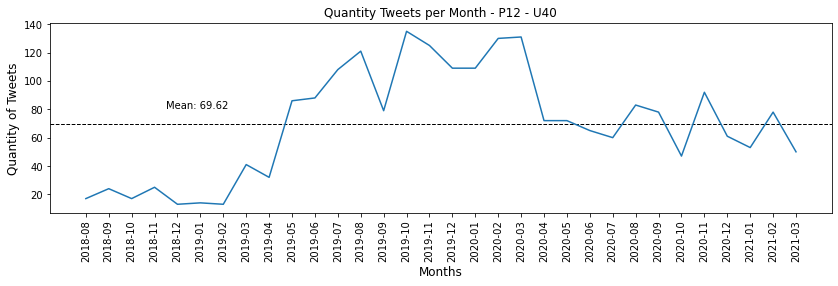

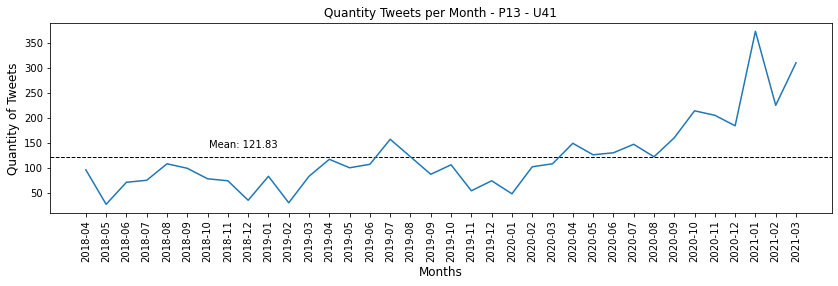

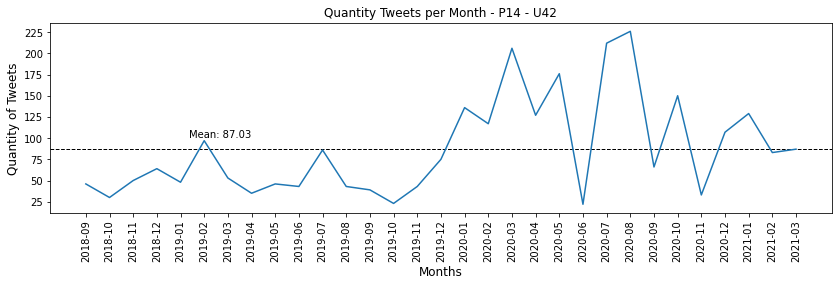

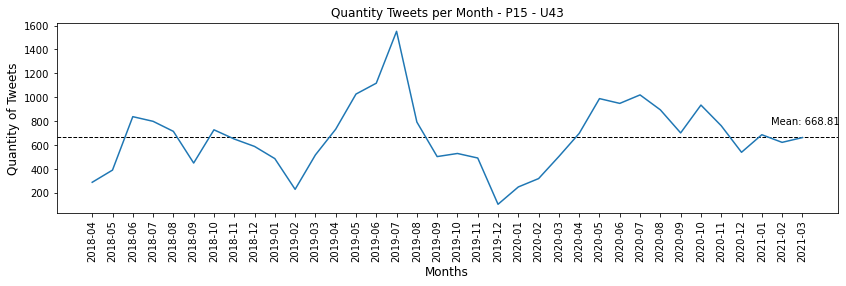

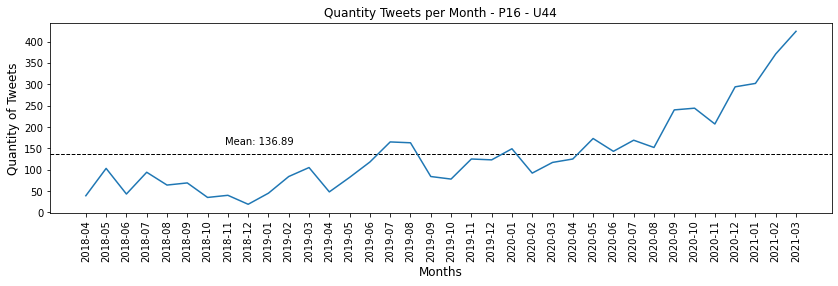

In [72]:
count = 1
for c in data:
    id_user = c
    if data[id_user]['bigfive']:
        tweets_pd = create_tweets_pd(data, id_user)

        tweets_pd['created_at'] = pd.to_datetime(tweets_pd['created_at'])
        tweets_pd['YearMonth'] = tweets_pd['created_at'].dt.year.astype(str) + "-" + tweets_pd['created_at'].dt.month.map("{:02}".format)

        df = tweets_pd.groupby(tweets_pd["YearMonth"]).count()

        df_result = pd.DataFrame(df["text"])
        df_result["YearMonth"] = list(df_result.index)

        create_line_plot(df_result, id_user, count)
#         create_histogram(df_result, id_user, count)
        count += 1

In [73]:
def totalize_data_by_month():
    df_result_all = {}
    all_df = []

    for c in data:
        id_user = c
        if data[id_user]['bigfive']:
            tweets_pd = create_tweets_pd(data, id_user)
            tweets_pd['created_at'] = pd.to_datetime(tweets_pd['created_at'])
            tweets_pd['YearMonth'] = tweets_pd['created_at'].dt.year.astype(str) + "-" + tweets_pd['created_at'].dt.month.map("{:02}".format)

            df = tweets_pd.groupby(tweets_pd["YearMonth"]).count()

            df_result = pd.DataFrame(df["text"])
            df_result["YearMonth"] = list(df_result.index)
            df_result_all = dict.fromkeys(list(df_result.index), 0)
            all_df.append(df_result)

    for d in df_result_all:
        for a in all_df:
            temp_df = a.loc[a['YearMonth']== d]
            if len(temp_df['text']) > 0:
                df_result_all[d] = df_result_all[d] + temp_df['text'][0]

    df_res = pd.DataFrame.from_records([df_result_all])
    df_res = df_res.transpose()
    return df_res

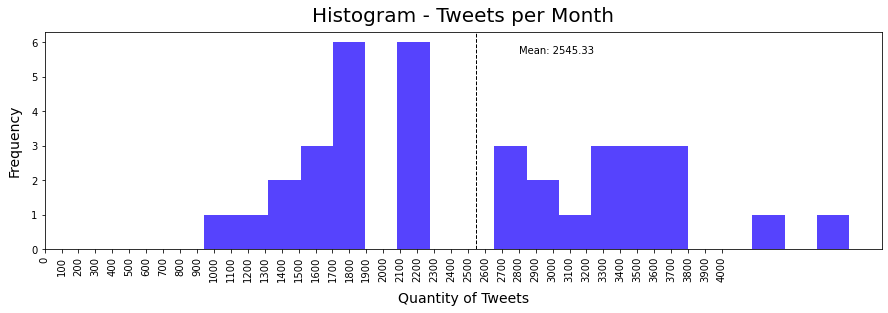

In [74]:
# HISTOGRAM OF TOTAL TWEETS, GROUPED BY MONTH

df = totalize_data_by_month()

fig = plt.figure(figsize=(15,4))

n, bins, patches = plt.hist(df, bins=20, color='#5643fd')

plt.xticks(np.arange(0, 4001, 100), rotation = 'vertical')

plt.axvline(df.mean()[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.mean()[0]*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.mean()[0]))

plt.title('Histogram - Tweets per Month', fontsize=20, pad=10)
plt.xlabel('Quantity of Tweets', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)

plt.show()

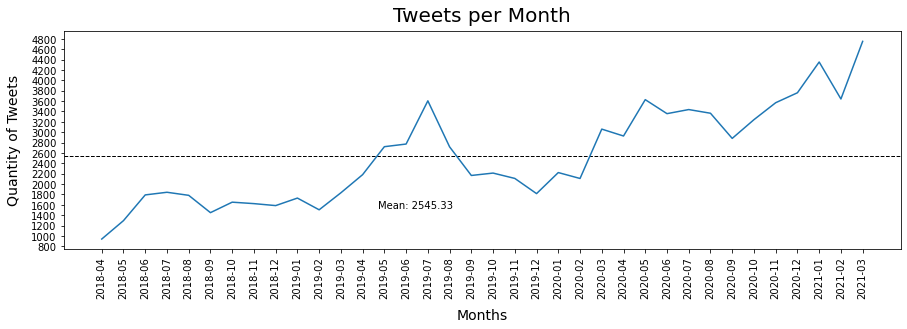

In [75]:
tickvalues = range(0,len(df.index))

fig = plt.figure(figsize=(15,4))

plt.xticks(ticks = tickvalues ,labels = df.index, rotation = 'vertical')
plt.yticks(np.arange(0, 5000, 200))

plt.title("Tweets per Month", fontsize=20, pad=10)
plt.ylabel("Quantity of Tweets", fontsize=14, labelpad=10)
plt.xlabel("Months", fontsize=14, labelpad=10)

plt.axhline(df.mean()[0], color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df.mean()[0]*0.005, max_ylim*0.32, 'Mean: {:.2f}'.format(df.mean()[0]))

plt.plot(df)

In [76]:
all_tweets

created_at  id_user  vader_sentiment_analysis_score  \
0     2021-03-31T19:13:28       26                         -0.4588   
1     2021-03-31T12:28:56       26                          0.0000   
2     2021-03-31T12:17:06       26                          0.7734   
3     2021-03-31T11:46:04       26                         -0.8720   
4     2021-03-30T17:58:24       26                         -0.6808   
...                   ...      ...                             ...   
4923  2020-08-17T19:09:02       44                          0.4939   
4924  2020-07-31T19:43:02       44                          0.3612   
4925  2020-10-08T20:29:24       44                          0.6114   
4926  2020-12-30T22:22:26       44                          0.4199   
4927  2021-02-11T18:21:29       44                          0.3382   

      oplexicon_sentiment_analysis_score  \
0                               0.000000   
1                               0.000000   
2                               0.458831   
3                               0.458831   
4                               0.000000   
...                                  ...   
4923                            0.000000   
4924                            0.000000   
4925                            0.000000   
4926                            0.329000   
4927                            0.454000   

      sentistrength_sentiment_analysis_score  \
0                                      0.000   
1                                      0.000   
2                                      0.000   
3                                      0.250   
4                                      0.000   
...                                      ...   
4923                                   0.250   
4924                                   0.250   
4925                                   0.250   
4926                                   0.329   
4927                                   0.329   

     sentistrength_sentiment_analysis_polarity  \
0                                          neu   
1                                          neu   
2                                          neu   
3                                          pos   
4                                          neu   
...                                        ...   
4923                                       pos   
4924                                       pos   
4925                                       pos   
4926                                       pos   
4927                                       pos   

      sentilexpt_sentiment_analysis_score  liwc_sentiment_analysis_score  \
0                                   0.000                         0.0000   
1                                   0.000                        -0.0667   
2                                   0.000                         0.0196   
3                                  -0.250                         0.0400   
4                                  -0.250                         0.0000   
...                                   ...                            ...   
4923                                0.000                         0.2000   
4924                                0.000                         0.0000   
4925                                0.250                        -0.0625   
4926                                0.329                         0.0000   
4927                                0.204                        -0.0625   

      final_score  final_score_ensemble final_polarity  \
0       -0.091760                0.0000            neg   
1       -0.013340                0.0000            neg   
2        0.250366                0.0000            pos   
3       -0.074634                0.0000            neg   
4       -0.186160               -0.1250            neg   
...           ...                   ...            ...   
4923     0.188780                0.1250            pos   
4924     0.122240                0.1250            pos   
4925     0.209780               

In [77]:
# g = sns.FacetGrid(all_tweets, col="Participant", col_wrap=3)
# g.fig.set_size_inches(15,10)
# g.fig.suptitle('Distribution - Polarity', fontsize=30, y=1)
# g.map(sns.kdeplot, "final_score_ensemble", fill=True, palette="crest")
# g.set_axis_labels("Polarity", 'Density', fontsize=14)

# xl = ''
# yl = ''

# for ax in g.axes:
#     xlabel = ax.xaxis.get_label_text()
#     if xlabel:
#         xl = xlabel
#     ylabel = ax.yaxis.get_label_text()
#     if ylabel:
#         yl = ylabel

        
# for ax in g.axes:
#     xlabel = ax.xaxis.get_label_text()
#     if not xlabel:
#         ax.xaxis.set_label_text(xl)
#     ylabel = ax.yaxis.get_label_text()
#     if not ylabel:
#         ax.yaxis.set_label_text(yl)
        

In [78]:
# count = 1
# for c in data:
#     id_user = c
#     if data[id_user]['bigfive']:
#         tweets_pd = create_tweets_pd(data, id_user)
#         fig = qqplot(tweets_pd['final_score_ensemble'], line='s')
#         fig.set_size_inches(8, 6)
#         plt.title("QQPlot - P{} - U{} - Tweet Score".format(count, id_user), fontsize=18, pad=10)
#         fig.savefig('images/qqplot_p{}_u{}.png'.format(count, id_user), bbox_inches='tight')
#         count += 1

In [79]:
# count = 1
# images_list = []

# for d in data:
#     if data[d]['bigfive']:
# #         image = plt.imread('images/qqplot_p{}_u{}.png'.format(count, d))
#         image = cv2.imread('images/qqplot_p{}_u{}.png'.format(count, d))
#         (b, g, r)=cv2.split(image)
#         image=cv2.merge([r,g,b])
#         images_list.append(image)
#         count += 1
        
# show_images(images_list, cols=3, rows=6)

In [80]:
bar_chart_data

[['P1', -0.02243102246923379, -0.035626573518284944],
 ['P2', -0.0006976673482849791, -0.0012101415331808103],
 ['P3', -0.007192311092380297, -0.010936885260189674],
 ['P4', 0.11344591390728473, 0.15379948396750742],
 ['P5', 0.05516038032037417, 0.07265410093626426],
 ['P6', 0.057805917069792496, 0.08106822051703565],
 ['P7', 0.05122516582524274, 0.07287558121546965],
 ['P8', 0.02835425225433524, 0.04541931148148145],
 ['P9', 0.06610487105018623, 0.09350855554338348],
 ['P10', -0.01733869738742568, -0.024208359223013075],
 ['P11', 0.04399359840263685, 0.06686348828516367],
 ['P12', -0.006252060278276488, -0.012981910810810826],
 ['P13', -0.012095010465116256, -0.02080341799999996],
 ['P14', -0.030198704373610077, -0.054172941755319136],
 ['P15', -0.01285789480001655, -0.020501955834436984],
 ['P16', 0.055043455884739995, 0.07684253558073617]]

In [81]:
data.head()

26                   27  \
id_str_twitter                23781146             15148309   
participant_id                       1                    2   
name                      Fe Rebelatto  Sommelier de Airbnb   
screen_name                  rebelatto            Guilh_rm_   
location        Rio de Janeiro, Brasil  somewhere in Brazil   

                                28                                   29  \
id_str_twitter  927028057763995648                             77648005   
participant_id                   3                                 None   
name                     ✪ Felippe  Conference Distinguished Specialist   
screen_name         FelippeRegazio                              NannoKa   
location                                                 Ctba-PR Brasil   

                           30                        31                   32  \
id_str_twitter     3429765093                  10794662  1034514325644431361   
participant_id              4                         5                    6   
name            Paula Santana  Maharaja of the Legacies              Jessica   
screen_name        psanrosa13                    rponte            dev_jessi   
location               Brasil             Ceará, Brazil   São Paulo - Brasil   

                                           33                 34  \
id_str_twitter                      529445600           12050562   
participant_id                           None                  7   
name            var nickname = "Riquettinha";  Roberta Arcoverde   
screen_name                       Riquettinha               rla4   
location               Belo Horizonte, Brasil  Sao Paulo, Brazil   

                             35                       36  \
id_str_twitter         62314491                 18289937   
participant_id                8                     None   
name                   Gabriela          Thamara Andrade   
screen_name     Gabrielathalita                   thamyk   
location         Belo Horizonte  Belo Horizonte, Brazil.   

                                   37                      38  \
id_str_twitter              172880784                18609547   
participant_id                      9                      10   
name                      felipe.ts ⚡              Juan Lopes   
screen_name             felipefialho_              juanplopes   
location        Dark Side of the Moon  Rio de Janeiro, Brasil   

                               39                   40  \
id_str_twitter         2164986296  1026783544457273345   
participant_id                 11                   12   
name                Rafael Dantas          iagor com i   
screen_name        RaffaelDantass              Iagor51   
location        São Paulo, Brasil                  Pvh   

                                           41                      42  \
id_str_twitter                      109604376     1040939562774790144   
participant_id                             13                      14   
name            T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷           Esdras Xavier   
screen_name                    RafaelMansilha          esdras_xavieer   
location            Palmas, Tocantins, Brasil  Jaraguá do Sul, Brasil   

                                                   43                  44  
id_str_twitter                               69734383           119897261  
participant_id                                     15                  16  
name            belle-🏴.dev || twitch.tv/bellesamways      Willian Justen  
screen_name                              bellesamways      Willian_justen  
location                                     Curitiba  Petrópolis, Brasil

In [82]:
df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    r = bf.query('Participant == {}'.format(i))
    print(r['Id User'])

0    26
Name: Id User, dtype: int64
1    27
Name: Id User, dtype: int64
2    28
Name: Id User, dtype: int64
3    30
Name: Id User, dtype: int64
4    31
Name: Id User, dtype: int64
5    32
Name: Id User, dtype: int64
6    34
Name: Id User, dtype: int64
7    35
Name: Id User, dtype: int64
8    37
Name: Id User, dtype: int64
9    38
Name: Id User, dtype: int64
10    39
Name: Id User, dtype: int64
11    40
Name: Id User, dtype: int64
12    41
Name: Id User, dtype: int64
13    42
Name: Id User, dtype: int64
14    43
Name: Id User, dtype: int64
15    44
Name: Id User, dtype: int64


In [83]:
df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean' : [],
            'O': [],
            'C': [],
            'E': [],
            'A': [],
            'N': []
          }

df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    t = all_tweets.query('Participant == {}'.format(i))
    bigfive = bf.query('Participant == {}'.format(i))
    vader_df = t[['final_score_ensemble', 'final_polarity_ensemble']].copy()
    qtd_pos = vader_df.query('final_polarity_ensemble == "pos"').count()
    qtd_neu = vader_df.query('final_polarity_ensemble == "neu"').count()
    qtd_neg = vader_df.query('final_polarity_ensemble == "neg"').count()
    qtd_total = vader_df['final_polarity_ensemble'].count()
    df_dict['id_user'].append(bigfive['Id User'].iloc[0])
#     print(type(bigfive['Id User'].iloc[0]))
    df_dict['pos'].append(qtd_pos.iloc[0])
    df_dict['neu'].append(qtd_neu.iloc[0])
    df_dict['neg'].append(qtd_neg.iloc[0])
    df_dict['por_pos'].append(((qtd_pos / qtd_total) * 100).iloc[0])
    df_dict['por_neu'].append(((qtd_neu / qtd_total) * 100).iloc[0])
    df_dict['por_neg'].append(((qtd_neg / qtd_total) * 100).iloc[0])
    df_dict['mean'].append(vader_df['final_score_ensemble'].mean())

    df_dict['O'].append(bigfive['O'].iloc[0])
    df_dict['C'].append(bigfive['C'].iloc[0])
    df_dict['E'].append(bigfive['E'].iloc[0])
    df_dict['A'].append(bigfive['A'].iloc[0])
    df_dict['N'].append(bigfive['N'].iloc[0])

df_chart = pd.DataFrame(df_dict)
df_chart

id_user   pos   neu   neg    por_pos    por_neu    por_neg      mean   O  \
0        26  1408  1866  1764  27.947598  37.038507  35.013894 -0.022431  37   
1        27  1367  1926  1255  30.057168  42.348285  27.594547 -0.000698  41   
2        28  1968  2031  1933  33.175995  34.238031  32.585974 -0.007192  43   
3        30  1719   832   620  54.210028  26.237780  19.552192  0.113446  17   
4        31  2993  1443  1557  49.941599  24.078091  25.980310  0.055160  22   
5        32  4386  2693  2306  46.734150  28.694726  24.571124  0.057806  39   
6        34   693   459   393  44.854369  29.708738  25.436893  0.051225  35   
7        35   895   975   725  34.489403  37.572254  27.938343  0.028354  29   
8        37  3235  1892  1329  50.108426  29.306072  20.585502  0.066105  40   
9        38  1646  1336  1726  34.961767  28.377230  36.661003 -0.017339  32   
10       39  1689  1349   906  42.824544  34.203854  22.971602  0.043994  31   
11       40   509  1155   564  22.845601  51.840215  25.314183 -0.006252  36   
12       41  1212  1836  1338  27.633379  41.860465  30.506156 -0.012095  29   
13       42   620  1194   884  22.979985  44.255004  32.765011 -0.030199  29   
14       43  7123  8977  7977  29.584251  37.284545  33.131204 -0.012858  29   
15       44  2381  1398  1149  48.315747  28.368506  23.315747  0.055043  30   

     C   E   A   N  
0   43  36  24  26  
1   43  34  22  23  
2   46  31  24  15  
3   33  33  22  39  
4   33  31  20   8  
5   49  39  28  15  
6   35  32  26  16  
7   45  34  35  29  
8   46  38  22  21  
9   46  19  18  28  
10  36  25  33  21  
11  45  31  31  19  
12  41  28  22  28  
13  43  27  23  35  
14  45  36  27  32  
15  35  24  20  32

In [84]:
data.head()

26                   27  \
id_str_twitter                23781146             15148309   
participant_id                       1                    2   
name                      Fe Rebelatto  Sommelier de Airbnb   
screen_name                  rebelatto            Guilh_rm_   
location        Rio de Janeiro, Brasil  somewhere in Brazil   

                                28                                   29  \
id_str_twitter  927028057763995648                             77648005   
participant_id                   3                                 None   
name                     ✪ Felippe  Conference Distinguished Specialist   
screen_name         FelippeRegazio                              NannoKa   
location                                                 Ctba-PR Brasil   

                           30                        31                   32  \
id_str_twitter     3429765093                  10794662  1034514325644431361   
participant_id              4                         5                    6   
name            Paula Santana  Maharaja of the Legacies              Jessica   
screen_name        psanrosa13                    rponte            dev_jessi   
location               Brasil             Ceará, Brazil   São Paulo - Brasil   

                                           33                 34  \
id_str_twitter                      529445600           12050562   
participant_id                           None                  7   
name            var nickname = "Riquettinha";  Roberta Arcoverde   
screen_name                       Riquettinha               rla4   
location               Belo Horizonte, Brasil  Sao Paulo, Brazil   

                             35                       36  \
id_str_twitter         62314491                 18289937   
participant_id                8                     None   
name                   Gabriela          Thamara Andrade   
screen_name     Gabrielathalita                   thamyk   
location         Belo Horizonte  Belo Horizonte, Brazil.   

                                   37                      38  \
id_str_twitter              172880784                18609547   
participant_id                      9                      10   
name                      felipe.ts ⚡              Juan Lopes   
screen_name             felipefialho_              juanplopes   
location        Dark Side of the Moon  Rio de Janeiro, Brasil   

                               39                   40  \
id_str_twitter         2164986296  1026783544457273345   
participant_id                 11                   12   
name                Rafael Dantas          iagor com i   
screen_name        RaffaelDantass              Iagor51   
location        São Paulo, Brasil                  Pvh   

                                           41                      42  \
id_str_twitter                      109604376     1040939562774790144   
participant_id                             13                      14   
name            T̷o̷m̷o̷y̷o̷ ̷ F̷u̷r̷a̷c̷ã̷o̷           Esdras Xavier   
screen_name                    RafaelMansilha          esdras_xavieer   
location            Palmas, Tocantins, Brasil  Jaraguá do Sul, Brasil   

                                                   43                  44  
id_str_twitter                               69734383           119897261  
participant_id                                     15                  16  
name            belle-🏴.dev || twitch.tv/bellesamways      Willian Justen  
screen_name                              bellesamways      Willian_justen  
location                                     Curitiba  Petrópolis, Brasil

In [85]:
# g = sns.pairplot(data=df_chart, x_vars=['pos', 'neu', 'neg'], y_vars=['O','C','E','A','N'], kind='reg')
# g.fig.set_size_inches(15,15)
# g.fig.suptitle('Linear Regression - Big Five x Tweets Quantity', fontsize=20, y=1.05)

# for ax in g.axes:
#     for a in ax:
#         a.set_ylabel(a.get_ylabel(), fontsize=14)
#         a.set_xlabel(a.get_xlabel(), fontsize=14)

In [86]:
# g = sns.pairplot(data=df_chart, x_vars=['por_pos', 'por_neu', 'por_neg'], y_vars=['O','C','E','A','N'], kind='reg')
# g.fig.set_size_inches(15,15)
# g.fig.suptitle('Linear Regression - Big Five x Tweets Percentage', fontsize=20, y=1.05)

# for ax in g.axes:
#     for a in ax:
#         a.set_ylabel(a.get_ylabel(), fontsize=14)
#         a.set_xlabel(a.get_xlabel(), fontsize=14)

In [87]:
all_df = pd.DataFrame()
df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    t = all_tweets.query('Participant == {}'.format(i))
    bigfive = bf.query('Participant == {}'.format(i))
    id_user = bigfive['Id User'].iloc[0]

    t = t.sort_values(by='created_at')

    t["created_at"] = pd.to_datetime(t["created_at"])
    t['date_minus_time'] = t["created_at"].apply(lambda t : datetime.datetime(year=t.year, 
                                                                              month=t.month,
                                                                              day=t.day))
    t.set_index(t["date_minus_time"],inplace=True)

    df_pos = t.query("final_polarity_ensemble == 'pos'")
    df_pos = pd.DataFrame(df_pos['final_score_ensemble'].resample('D').mean())

    df_neg = t.query("final_polarity_ensemble == 'neg'")
    df_neg = pd.DataFrame(df_neg['final_score_ensemble'].resample('D').mean())

    df_final = df_pos.append(df_neg)
    df_final = df_final.fillna(0)

    df_final['id_user'] = id_user
    df_final['date'] = df_final.index
    df_final = df_final.reset_index(drop=True)

    df_final.sort_values(by=['date'])
    df_final['Participant'] = t['Participant'].iloc[0]

    if all_df.empty:
        all_df = df_final
    else:
        all_df = all_df.append(df_final)

#     plot_point_chart_pos_neg(df_final, count, id_user)

    count += 1
    

all_df['pol'] = np.where(all_df['final_score_ensemble'] > 0, 'pos', np.where(all_df['final_score_ensemble'] < 0, 'neg', 'neu'))
all_df

final_score_ensemble  id_user       date  Participant  pol
0                 0.166667       26 2018-04-02            1  pos
1                 0.000000       26 2018-04-03            1  neu
2                 0.239708       26 2018-04-04            1  pos
3                 0.000000       26 2018-04-05            1  neu
4                 0.250000       26 2018-04-06            1  pos
...                    ...      ...        ...          ...  ...
2185              0.000000       44 2021-03-27           16  neu
2186             -0.182354       44 2021-03-28           16  neg
2187             -0.177208       44 2021-03-29           16  neg
2188             -0.338339       44 2021-03-30           16  neg
2189             -0.177208       44 2021-03-31           16  neg

[33953 rows x 5 columns]

In [95]:
all_df.query('Participant == 1 and date == "2018-05-04"')

final_score_ensemble  id_user       date  Participant  pol
32                0.195883       26 2018-05-04            1  pos
1125             -0.330300       26 2018-05-04            1  neg

In [112]:
mean_df = all_df.groupby(['Participant', 'id_user', 'date'], as_index=False)['final_score_ensemble'].mean()
mean_df['pol'] = 'mean'
mean_df = mean_df[['final_score_ensemble','id_user','date','Participant','pol']]
mean_df

final_score_ensemble  id_user       date  Participant   pol
0              1.666667e-01       26 2018-04-02            1  mean
1             -1.250000e-01       26 2018-04-03            1  mean
2             -1.250000e-07       26 2018-04-04            1  mean
3              0.000000e+00       26 2018-04-05            1  mean
4              6.250000e-02       26 2018-04-06            1  mean
...                     ...      ...        ...          ...   ...
17023          6.250000e-02       44 2021-03-27           16  mean
17024          3.258430e-02       44 2021-03-28           16  mean
17025         -8.860400e-02       44 2021-03-29           16  mean
17026         -1.136750e-02       44 2021-03-30           16  mean
17027          6.324571e-03       44 2021-03-31           16  mean

[17028 rows x 5 columns]

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

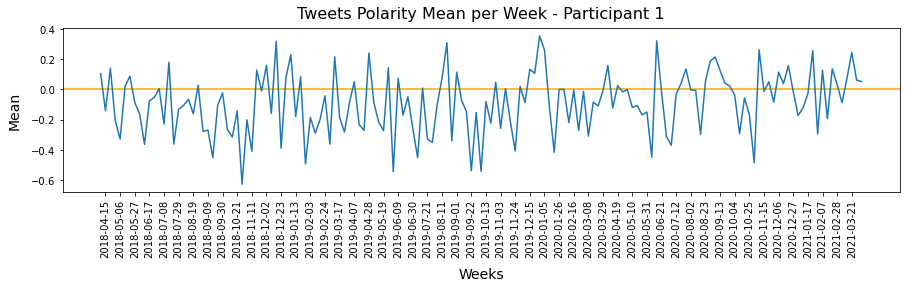

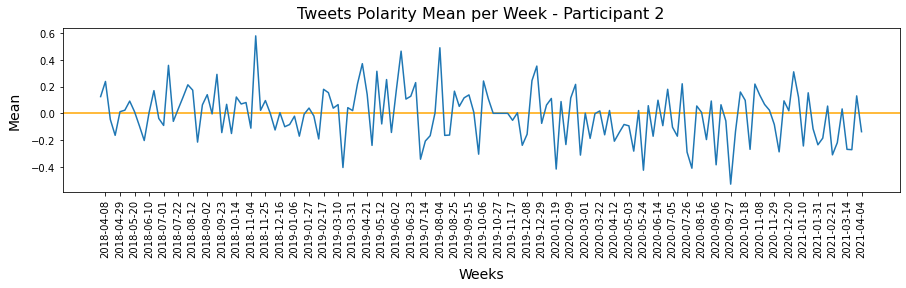

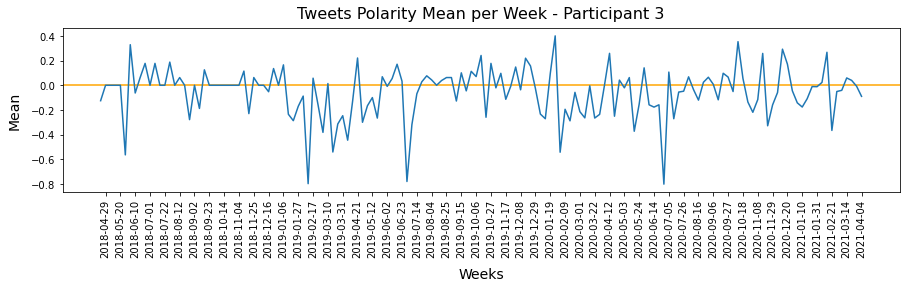

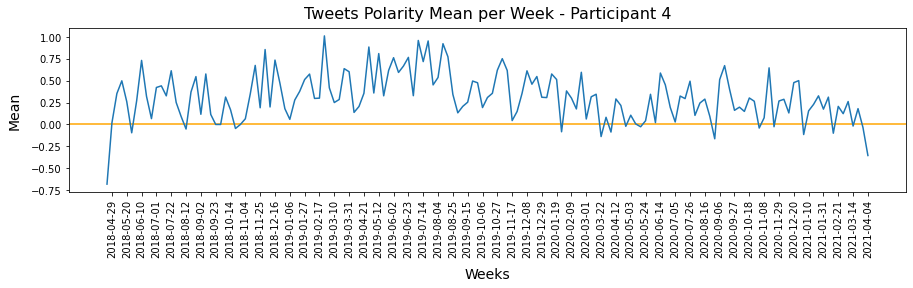

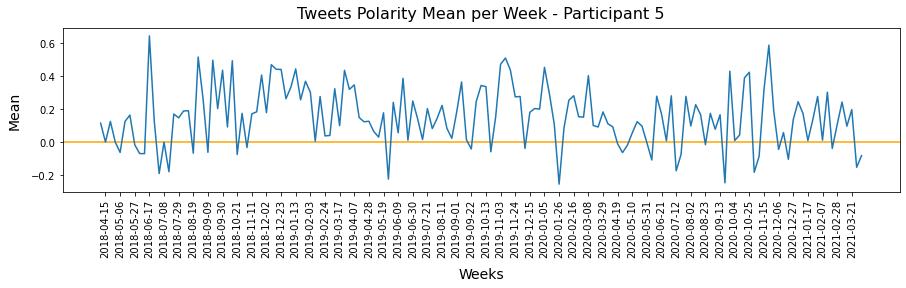

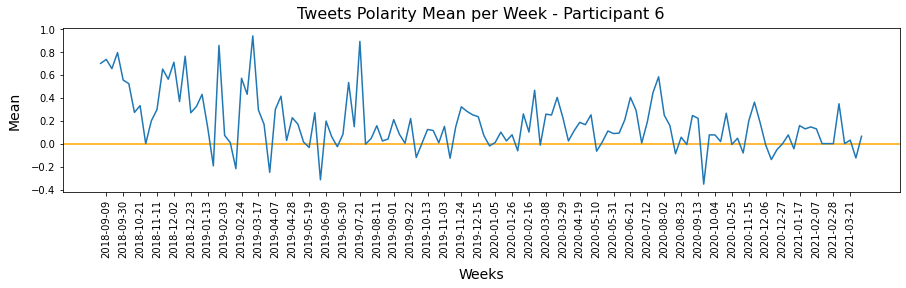

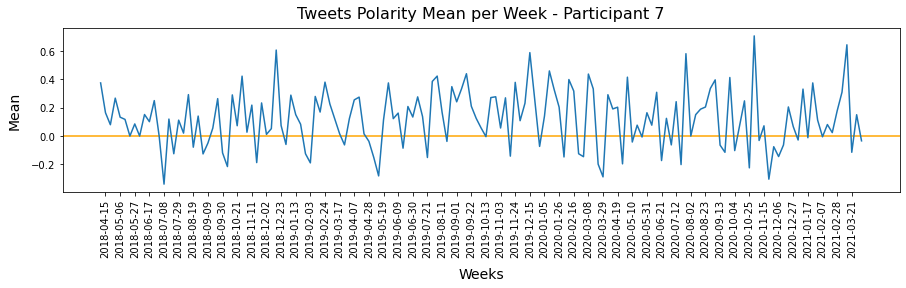

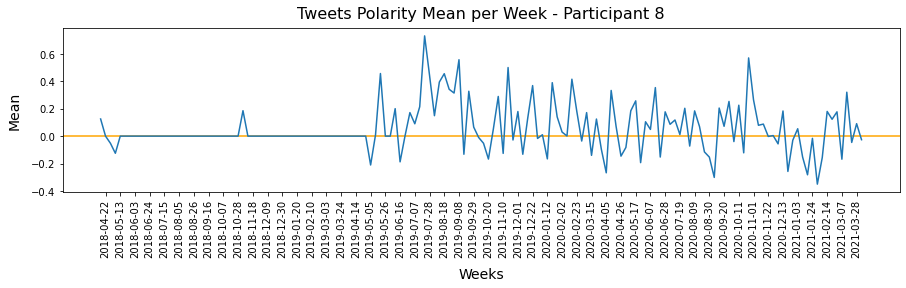

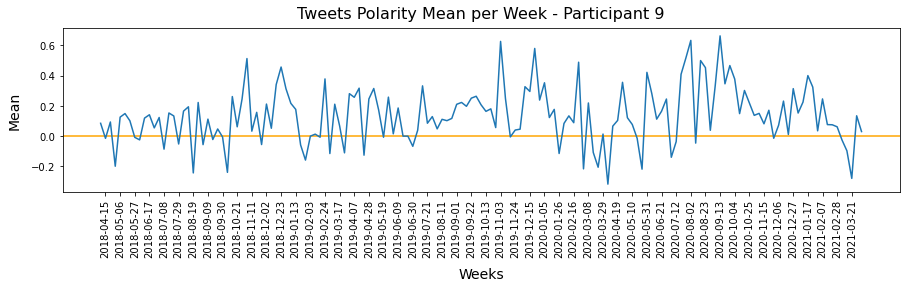

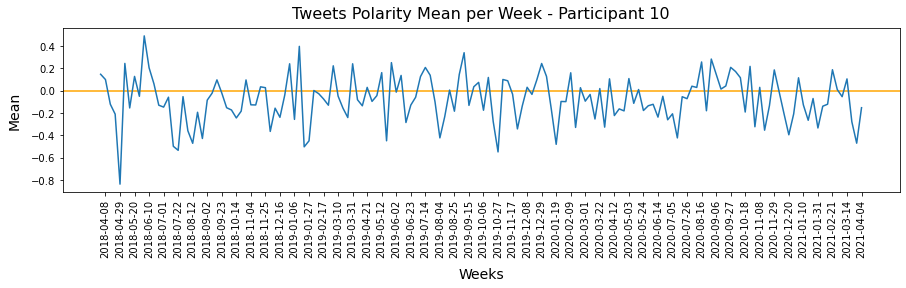

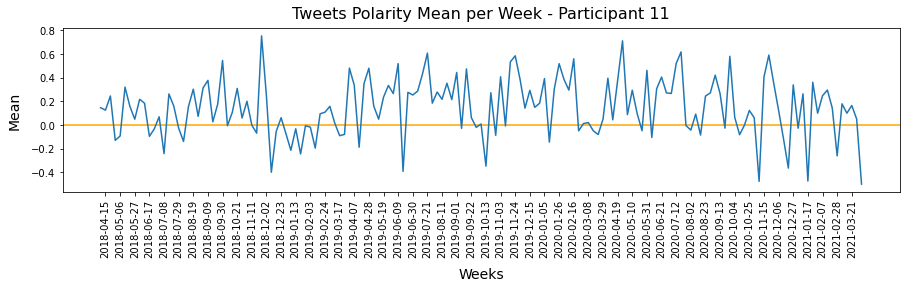

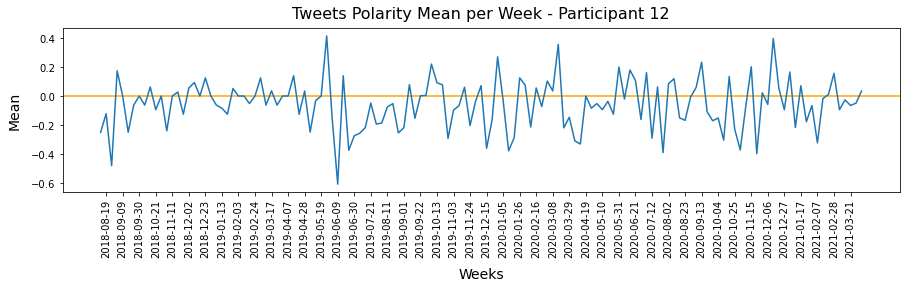

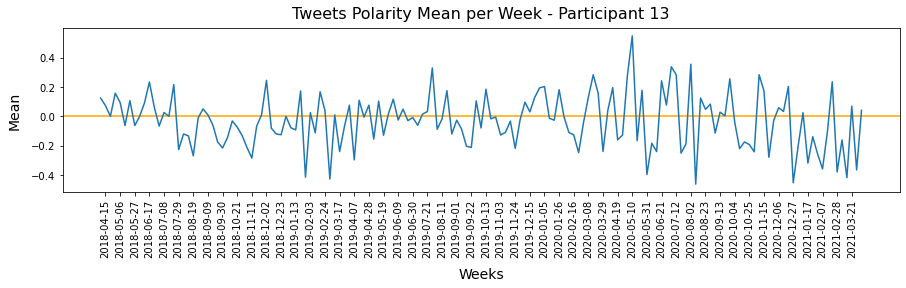

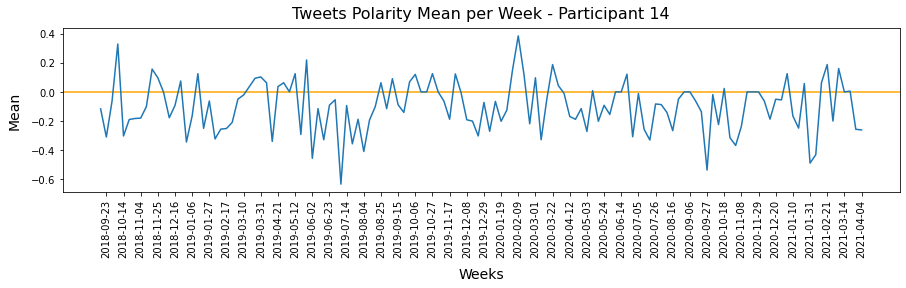

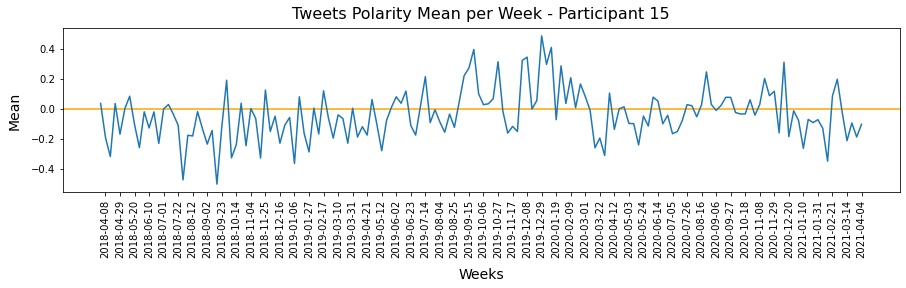

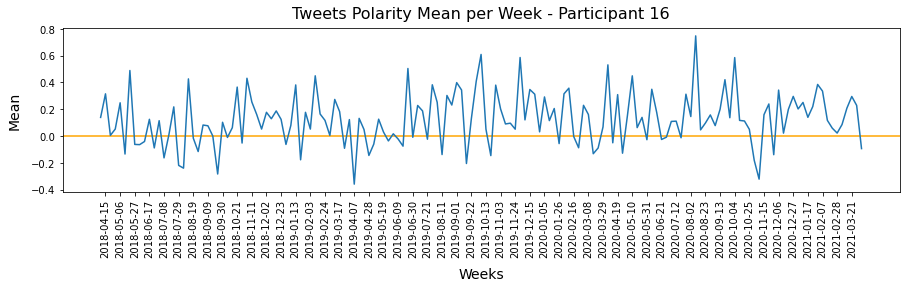

In [169]:
mean_df_grouped = mean_df.groupby(['Participant'])
for i in range(1,len(mean_df_grouped)+1):
    t = mean_df.query('Participant == {}'.format(i))
    t['date'] = pd.to_datetime(t['date'])
    t = t.set_index('date') 
    weekly_summary = t['final_score_ensemble'].resample('W').sum()
    weekly_df = pd.DataFrame(weekly_summary)
    weekly_df['Participant'] = i
    
    tickvalues = list(weekly_df.index)[1::3]

    fig = plt.figure(figsize=(15,3))

    plt.xticks(ticks = tickvalues,labels = list(weekly_df.index.date)[1::3], rotation = 'vertical')
#     plt.yticks(np.arange(0, 5000, 200))

    plt.title("Tweets Polarity Mean per Week - Participant {}".format(i), fontsize=16, pad=10)
    plt.ylabel("Mean", fontsize=14, labelpad=10)
    plt.xlabel("Weeks", fontsize=14, labelpad=10)
    
    plt.axhline(0, color='orange')

#     plt.axhline(df.mean()[0], color='k', linestyle='dashed', linewidth=1)
#     min_ylim, max_ylim = plt.ylim()
#     plt.text(df.mean()[0]*0.005, max_ylim*0.32, 'Mean: {:.2f}'.format(df.mean()[0]))

    plt.plot(weekly_df['final_score_ensemble'])
    
#     print(weekly_df.head())

In [89]:
# mean_df.query('Participant == 1 and date == "2020-06-25"')

final_score_ensemble  id_user       date  Participant   pol
815             -0.046746       26 2020-06-25            1  mean

In [39]:
# all_df = all_df.append(mean_df)
# all_df

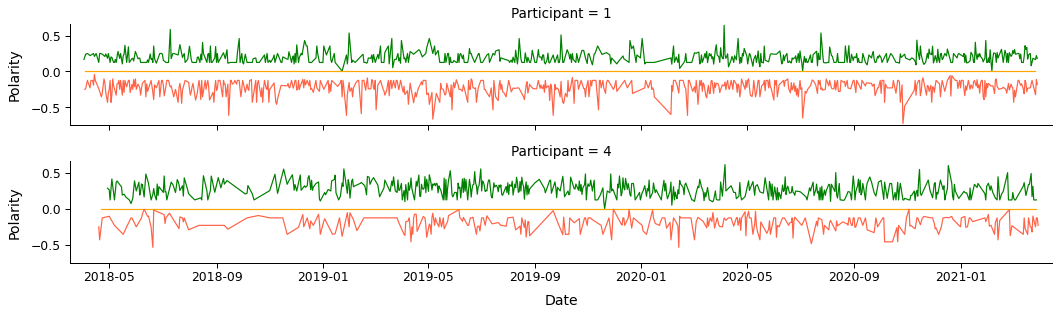

In [160]:
temp_df = pd.DataFrame()
temp_df = all_df.query('Participant == 1')
temp_df = temp_df.append(all_df.query('Participant == 4'))
# temp_df = temp_df.append(all_df.query('Participant == 15'))
# temp_df = temp_df.append(all_df.query('Participant == 16'))

# print(temp_df)

with sns.plotting_context('paper', font_scale = 1.4):    
    # g = sns.FacetGrid(all_df, row="Participant", hue='pol', legend_out=True, palette="muted")
    g = sns.FacetGrid(temp_df, row="Participant", hue='pol', legend_out=True, palette=['green','orange','tomato'])
    g.fig.set_size_inches(15,4.5)
    g.map(sns.lineplot, 'date', "final_score_ensemble")

    # g.fig.suptitle('Tweets - Polarity', fontsize=20, y=1.01)
    g.set_axis_labels("Date", 'Polarity', fontsize=14)

    for ax in g.axes:
        for a in ax:
            a.set_ylabel("Polarity", fontsize=14, labelpad=10)
            a.set_xlabel("Date", fontsize=14, labelpad=10)

#     g.add_legend(fontsize='x-large', title="Polarity", labels=['Positive', 'Neutral', 'Negative'])
#     plt.setp(g._legend.get_title(), fontsize=14)
    plt.margins(0.015, tight=True)

In [ ]:
mean_df.head()

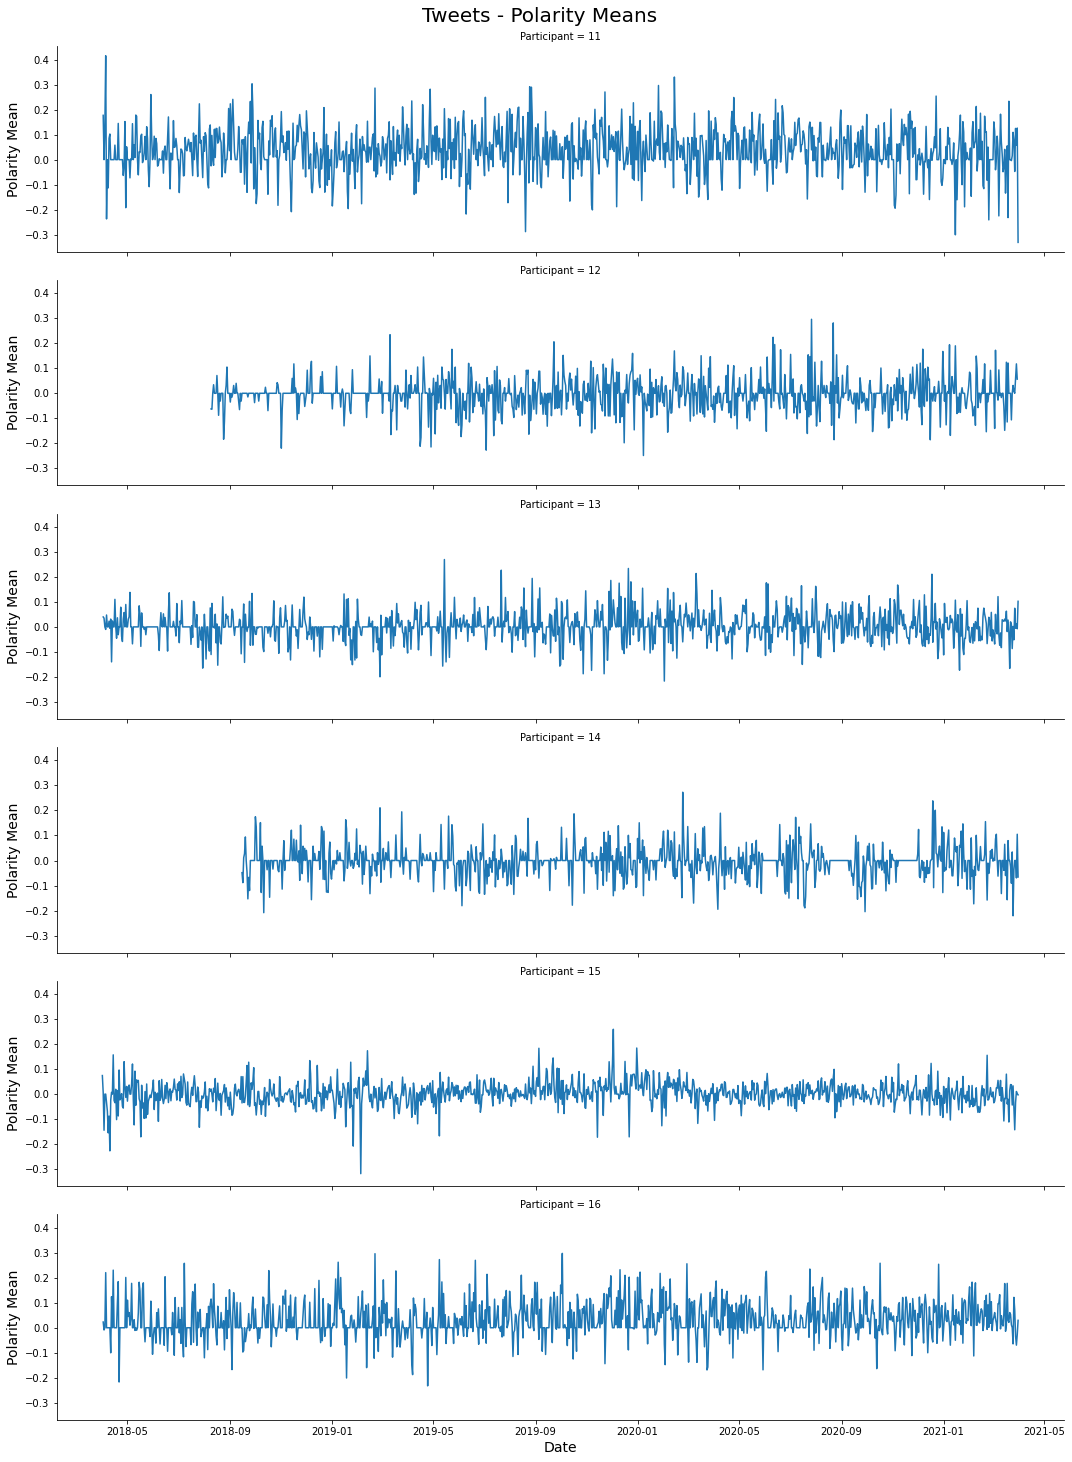

In [41]:
g = sns.FacetGrid(mean_df.query('Participant > 10'), row="Participant")
g.fig.set_size_inches(15,20)
g.map(sns.lineplot, 'date', "final_score")

g.fig.suptitle('Tweets - Polarity Means', fontsize=20, y=1.01)
g.set_axis_labels("Date", 'Polarity Mean', fontsize=14)
        
for ax in g.axes:
    for a in ax:
        a.set_ylabel("Polarity Mean", fontsize=14)
        a.set_xlabel("Date", fontsize=14)

In [178]:
all_tweets['final_score'].describe()

count    91632.000000
mean        -0.009060
std          0.193707
min         -0.756221
25%         -0.125000
50%          0.000000
75%          0.125000
max          0.726270
Name: final_score, dtype: float64

[Text(0, 1, '')]

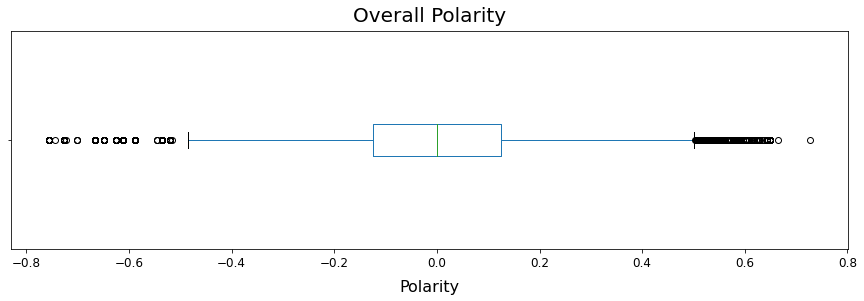

In [179]:
bplot = all_tweets.boxplot(column=['final_score'], grid=False, figsize=(15,4), vert=False)
# y_range = range(0,4501, 500)

bplot.axes.set_title("Overall Polarity", fontsize=20, pad = 10)
 
bplot.set_xlabel("Polarity", fontsize=16, labelpad=10) 
# bplot.set_ylabel("Quantity of Tweets", fontsize=16, labelpad=10)
# bplot.set_yticks(y_range)
bplot.tick_params(labelsize=12)
bplot.set_yticklabels([''])

In [429]:
count = 1
bf_df = pd.DataFrame()

df_grouped = all_tweets.groupby(['Participant'])
for i in range(1,len(df_grouped)+1):
    t = all_tweets.query('Participant == {}'.format(i))
    bigfive = bf.query('Participant == {}'.format(i))
    bigfive.columns = ['Participant', 'id_user', 'O', 'C', 'E', 'A', 'N']
    bigfive['Participant'] = 'P{}'.format(count)
#     del b['id']
    del bigfive['id_user']
#     bigfive = bigfive[['id_user', 'Participant', 'O', 'C', 'E', 'A', 'N']]
    if bf_df.empty:
        bf_df = bigfive
    else:
        bf_df = bf_df.append(bigfive)
    count +=1

df1 = create_boxplot_chart_data(all_tweets, False)
df2 = create_boxplot_chart_data(all_tweets, True)
df = df1.merge(df2)
# print(df)
# print(bf_df)
df = df.merge(bf_df)
df

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Participant   pos   neu   neg    por_pos    por_neu    por_neg   O   C   E  \
0           P1  1408  1866  1764  27.947598  37.038507  35.013894  37  43  36   
1           P2  1367  1926  1255  30.057168  42.348285  27.594547  41  43  34   
2           P3  1968  2031  1933  33.175995  34.238031  32.585974  43  46  31   
3           P4  1719   832   620  54.210028  26.237780  19.552192  17  33  33   
4           P5  2993  1443  1557  49.941599  24.078091  25.980310  22  33  31   
5           P6  4386  2693  2306  46.734150  28.694726  24.571124  39  49  39   
6           P7   693   459   393  44.854369  29.708738  25.436893  35  35  32   
7           P8   895   975   725  34.489403  37.572254  27.938343  29  45  34   
8           P9  3235  1892  1329  50.108426  29.306072  20.585502  40  46  38   
9          P10  1646  1336  1726  34.961767  28.377230  36.661003  32  46  19   
10         P11  1689  1349   906  42.824544  34.203854  22.971602  31  36  25   
11         P12   509  1155   564  22.845601  51.840215  25.314183  36  45  31   
12         P13  1212  1836  1338  27.633379  41.860465  30.506156  29  41  28   
13         P14   620  1194   884  22.979985  44.255004  32.765011  29  43  27   
14         P15  7123  8977  7977  29.584251  37.284545  33.131204  29  45  36   
15         P16  2381  1398  1149  48.315747  28.368506  23.315747  30  35  24   

     A   N  
0   24  26  
1   22  23  
2   24  15  
3   22  39  
4   20   8  
5   28  15  
6   26  16  
7   35  29  
8   22  21  
9   18  28  
10  33  21  
11  31  19  
12  22  28  
13  23  35  
14  27  32  
15  20  32

In [430]:
biglist = ['O', 'C', 'E', 'A', 'N']
for b in biglist:
    res = []
    for r in df[b]:
        if r <= 10:
            res.append(1)
        elif r > 10 and r < 21:
            res.append(2)
        elif r > 20 and r < 31:
            res.append(3)
        elif r > 30 and r < 41:
            res.append(4)
        elif r > 40:
            res.append(5)

    df['{}_Coded'.format(b)] = res
df

Participant   pos   neu   neg    por_pos    por_neu    por_neg   O   C   E  \
0           P1  1408  1866  1764  27.947598  37.038507  35.013894  37  43  36   
1           P2  1367  1926  1255  30.057168  42.348285  27.594547  41  43  34   
2           P3  1968  2031  1933  33.175995  34.238031  32.585974  43  46  31   
3           P4  1719   832   620  54.210028  26.237780  19.552192  17  33  33   
4           P5  2993  1443  1557  49.941599  24.078091  25.980310  22  33  31   
5           P6  4386  2693  2306  46.734150  28.694726  24.571124  39  49  39   
6           P7   693   459   393  44.854369  29.708738  25.436893  35  35  32   
7           P8   895   975   725  34.489403  37.572254  27.938343  29  45  34   
8           P9  3235  1892  1329  50.108426  29.306072  20.585502  40  46  38   
9          P10  1646  1336  1726  34.961767  28.377230  36.661003  32  46  19   
10         P11  1689  1349   906  42.824544  34.203854  22.971602  31  36  25   
11         P12   509  1155   564  22.845601  51.840215  25.314183  36  45  31   
12         P13  1212  1836  1338  27.633379  41.860465  30.506156  29  41  28   
13         P14   620  1194   884  22.979985  44.255004  32.765011  29  43  27   
14         P15  7123  8977  7977  29.584251  37.284545  33.131204  29  45  36   
15         P16  2381  1398  1149  48.315747  28.368506  23.315747  30  35  24   

     A   N  O_Coded  C_Coded  E_Coded  A_Coded  N_Coded  
0   24  26        4        5        4        3        3  
1   22  23        5        5        4        3        3  
2   24  15        5        5        4        3        2  
3   22  39        2        4        4        3        4  
4   20   8        3        4        4        2        1  
5   28  15        4        5        4        3        2  
6   26  16        4        4        4        3        2  
7   35  29        3        5        4        4        3  
8   22  21        4        5        4        3        3  
9   18  28        4        5        2        2        3  
10  33  21        4        4        3        4        3  
11  31  19        4        5        4        4        2  
12  22  28        3        5        3        3        3  
13  23  35        3        5        3        3        4  
14  27  32        3        5        4        3        4  
15  20  32        3        4        3        2        4

In [431]:
df.rcorr(method='spearman', upper='pval', decimals=3, padjust=None, stars=False)

pos     neu     neg por_pos por_neu por_neg       O       C  \
pos           -   0.005   0.004   0.017   0.009   0.425   0.900   0.516   
neu       0.662       -   0.000   0.737    0.88   0.405   0.082   0.063   
neg       0.682   0.874       -   0.854   0.535   0.068    0.35   0.057   
por_pos   0.588  -0.091   -0.05       -   0.000   0.006   0.646   0.357   
por_neu  -0.632   0.041  -0.168  -0.897       -   0.137   0.458   0.325   
por_neg  -0.215   0.224   0.468  -0.653   0.388       -   0.922   0.249   
O         0.034   0.447    0.25  -0.124     0.2   0.027       -   0.014   
C         0.175   0.476   0.484  -0.247   0.263   0.306   0.602       -   
E         0.335   0.424   0.267   0.131   0.061  -0.121   0.296   0.343   
A        -0.217  -0.058  -0.171  -0.326   0.478  -0.071   0.138   0.268   
N        -0.142  -0.263  -0.199  -0.142   0.146   0.146  -0.538  -0.206   
O_Coded  -0.068   0.348   0.204  -0.171   0.209   0.109   0.937   0.503   
C_Coded  -0.132   0.453   0.424  -0.629   0.629    0.57   0.427   0.813   
E_Coded   0.181   0.199   0.036   0.145   0.027   -0.19   0.255   0.114   
A_Coded  -0.421  -0.199  -0.399  -0.376    0.62  -0.199   0.123   0.179   
N_Coded   0.059  -0.064   -0.08  -0.051   0.084   0.047  -0.407  -0.179   

              E       A       N O_Coded C_Coded E_Coded A_Coded N_Coded  
pos       0.204   0.420   0.601   0.802   0.627   0.503   0.105   0.827  
neu       0.102   0.831   0.326   0.187   0.078   0.460   0.459   0.814  
neg       0.317   0.528    0.46   0.449   0.102   0.894   0.126    0.77  
por_pos   0.627   0.217   0.601   0.527   0.009   0.593   0.151    0.85  
por_neu   0.824   0.061   0.589   0.438   0.009   0.921   0.010   0.756  
por_neg   0.655   0.793   0.589   0.687   0.021   0.481   0.459   0.863  
O         0.265    0.61   0.032   0.000   0.099   0.341   0.651   0.118  
C         0.193   0.316   0.443   0.047   0.000   0.674   0.507   0.507  
E             -    0.18   0.512   0.608   0.201   0.000   0.339   0.642  
A         0.353       -   0.534   0.553   0.512   0.176   0.000   0.489  
N        -0.177  -0.168       -   0.009   0.871   0.141   0.903   0.000  
O_Coded   0.139    0.16   -0.63       -   0.212   0.505   0.567   0.039  
C_Coded   0.338   0.177   0.044    0.33       -   0.741   0.413      1.  
E_Coded   0.817   0.356  -0.385    0.18    0.09       -   0.308   0.132  
A_Coded   0.256   0.871  -0.033   0.155    0.22   0.272       -   0.795  
N_Coded  -0.126  -0.187   0.945   -0.52     0.0  -0.393   -0.07       -

Text(0.5, 1.0, 'Correlation matrix')

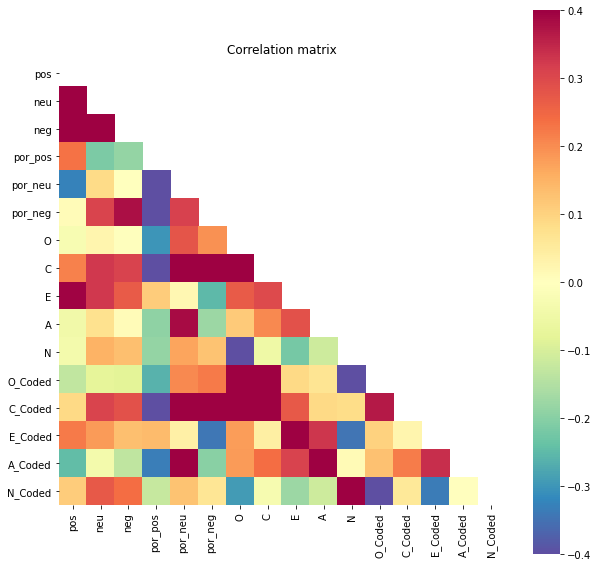

In [432]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [47]:
# Test equality of variance
pg.homoscedasticity(df[['pos', 'neg', 'O', 'C', 'E', 'A', 'N']])

W      pval  equal_var
levene  1.090985  0.375031       True

In [48]:
all_tweets

created_at  id_user  final_score final_polarity  Participant
0     2021-03-31T19:13:28       26    -0.114700            neg            1
1     2021-03-31T12:28:56       26     0.000000            neu            1
2     2021-03-31T12:17:06       26     0.308058            pos            1
3     2021-03-31T11:46:04       26    -0.103292            neg            1
4     2021-03-30T17:58:24       26    -0.232700            neg            1
...                   ...      ...          ...            ...          ...
4923  2020-08-17T19:09:02       44     0.185975            pos           16
4924  2020-07-31T19:43:02       44     0.152800            pos           16
4925  2020-10-08T20:29:24       44     0.277850            pos           16
4926  2020-12-30T22:22:26       44     0.351725            pos           16
4927  2021-02-11T18:21:29       44     0.331300            pos           16

[91632 rows x 5 columns]

In [161]:
# Test equality of variance
pg.homoscedasticity(all_tweets[['final_score', 'final_polarity', 'Participant']])

W  pval  equal_var
levene  3.386245e+32   0.0      False

In [433]:
pg.normality(all_tweets)

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


W          pval  normal
id_user                                 0.875137  0.000000e+00   False
vader_sentiment_analysis_score          0.972016  0.000000e+00   False
oplexicon_sentiment_analysis_score      0.947366  0.000000e+00   False
sentistrength_sentiment_analysis_score  0.909519  0.000000e+00   False
sentilexpt_sentiment_analysis_score     0.921986  0.000000e+00   False
liwc_sentiment_analysis_score           0.848185  0.000000e+00   False
final_score                             0.995845  3.545846e-41   False
final_score_ensemble                    0.965124  0.000000e+00   False
Participant                             0.890149  0.000000e+00   False
is_work_time                            0.629558  0.000000e+00   False

Text(0.5, 1.0, 'KDE - All Participants - Tweet Score')

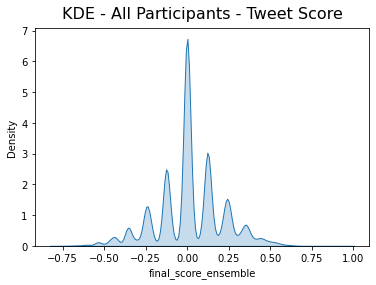

In [434]:
sns.kdeplot(all_tweets['final_score_ensemble'], fill=True)
plt.title("KDE - All Participants - Tweet Score", fontsize=16, pad=10)

Text(0.5, 1.0, 'Histogram - All Participants - Tweet Score')

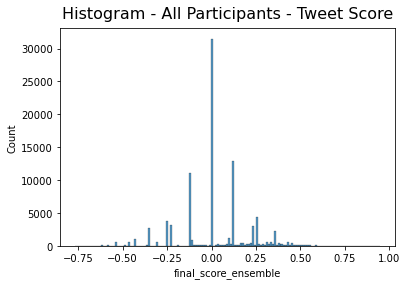

In [435]:
sns.histplot(all_tweets['final_score_ensemble'])
plt.title("Histogram - All Participants - Tweet Score", fontsize=16, pad=10)

Text(0.5, 1.0, 'QQPlot - All Participants - Tweet Score')

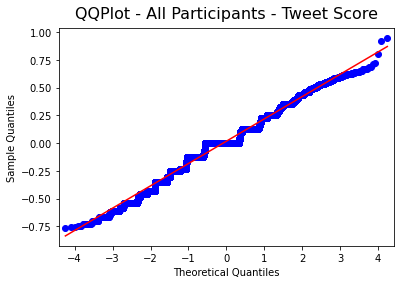

In [436]:
fig = qqplot(all_tweets['final_score_ensemble'], line='s')
plt.title("QQPlot - All Participants - Tweet Score", fontsize=16, pad=10)

In [437]:
model = ols('por_pos ~ O + C + E + A + N', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     1.389
Date:                Sat, 24 Jul 2021   Prob (F-statistic):              0.307
Time:                        18:04:32   Log-Likelihood:                -55.542
No. Observations:                  16   AIC:                             123.1
Df Residuals:                      10   BIC:                             127.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.7765     26.067      3.214      0.009      25.695     141.858
O             -0.2206      0.577     -0.382      0.710      -1.507       1.065
C             -0.9624      0.704     -1.367      0.202      -2.532       0.607
E              0.5769      0.517      1.116      0.291      -0.575       1.729
A             -0.4076      0.554     -0.736      0.479      -1.642       0.827
N             -0.2886      0.370     -0.780      0.453      -1.113       0.536
==============================================================================
Omnibus:                        4.762   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                1.449
Skew:                           0.161   Prob(JB):                        0.485
Kurtosis:                       1.561   Cond. No.                         748.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [438]:
model = ols('por_neg ~ O + C + E + A + N', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1.453
Date:                Sat, 24 Jul 2021   Prob (F-statistic):              0.287
Time:                        18:04:36   Log-Likelihood:                -44.142
No. Observations:                  16   AIC:                             100.3
Df Residuals:                      10   BIC:                             104.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0269     12.784      1.488      0.168      -9.458      47.512
O             -0.1037      0.283     -0.366      0.722      -0.734       0.527
C              0.6845      0.345      1.982      0.076      -0.085       1.454
E             -0.3519      0.254     -1.388      0.195      -0.917       0.213
A             -0.2134      0.272     -0.785      0.450      -0.819       0.392
N             -0.0032      0.181     -0.018      0.986      -0.407       0.401
==============================================================================
Omnibus:                        0.240   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.035
Skew:                           0.074   Prob(JB):                        0.983
Kurtosis:                       2.827   Cond. No.                         748.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [439]:
model = ols('por_pos ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     2.724
Date:                Sat, 24 Jul 2021   Prob (F-statistic):             0.0833
Time:                        18:04:39   Log-Likelihood:                -52.886
No. Observations:                  16   AIC:                             117.8
Df Residuals:                      10   BIC:                             122.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.5454     27.439      3.737      0.004      41.407     163.684
O_Coded       -0.2785      3.348     -0.083      0.935      -7.738       7.180
C_Coded      -13.8948      5.099     -2.725      0.021     -25.257      -2.533
E_Coded        4.2050      3.989      1.054      0.317      -4.683      13.093
A_Coded       -4.5494      3.759     -1.210      0.254     -12.925       3.826
N_Coded       -0.1591      3.023     -0.053      0.959      -6.895       6.577
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.230
Skew:                           0.914   Prob(JB):                        0.328
Kurtosis:                       2.928   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [440]:
model = ols('por_pos ~ O_Coded + C_Coded + E_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     3.744
Date:                Sat, 24 Jul 2021   Prob (F-statistic):             0.0370
Time:                        18:04:41   Log-Likelihood:                -52.888
No. Observations:                  16   AIC:                             115.8
Df Residuals:                      11   BIC:                             119.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.8896     23.310      4.371      0.001      50.584     153.195
O_Coded       -0.1893      2.753     -0.069      0.946      -6.248       5.869
C_Coded      -13.9616      4.710     -2.964      0.013     -24.328      -3.596
E_Coded        4.2810      3.546      1.207      0.253      -3.523      12.085
A_Coded       -4.5784      3.546     -1.291      0.223     -12.382       3.225
==============================================================================
Omnibus:                        3.520   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.221
Skew:                           0.912   Prob(JB):                        0.329
Kurtosis:                       2.919   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [441]:
model = ols('por_pos ~ C_Coded + E_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     5.441
Date:                Sat, 24 Jul 2021   Prob (F-statistic):             0.0135
Time:                        18:04:48   Log-Likelihood:                -52.892
No. Observations:                  16   AIC:                             113.8
Df Residuals:                      12   BIC:                             116.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.8311     22.308      4.565      0.001      53.227     150.435
C_Coded      -14.0763      4.218     -3.337      0.006     -23.267      -4.886
E_Coded        4.2608      3.384      1.259      0.232      -3.112      11.633
A_Coded       -4.5841      3.394     -1.351      0.202     -11.980       2.812
==============================================================================
Omnibus:                        3.490   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                2.225
Skew:                           0.912   Prob(JB):                        0.329
Kurtosis:                       2.896   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [443]:
model = ols('por_pos ~ C_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     7.051
Date:                Sat, 24 Jul 2021   Prob (F-statistic):            0.00844
Time:                        18:05:01   Log-Likelihood:                -53.885
No. Observations:                  16   AIC:                             113.8
Df Residuals:                      13   BIC:                             116.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.1522     20.494      5.570      0.000      69.878     158.427
C_Coded      -14.3477      4.307     -3.332      0.005     -23.651      -5.044
A_Coded       -3.1186      3.260     -0.957      0.356     -10.161       3.923
==============================================================================
Omnibus:                        5.920   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                3.469
Skew:                           1.111   Prob(JB):                        0.176
Kurtosis:                       3.519   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [444]:
model = ols('por_pos ~ C_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_pos   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     13.27
Date:                Sat, 24 Jul 2021   Prob (F-statistic):            0.00266
Time:                        18:05:07   Log-Likelihood:                -54.429
No. Observations:                  16   AIC:                             112.9
Df Residuals:                      14   BIC:                             114.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.0489     19.728      5.528      0.000      66.737     151.361
C_Coded      -15.2549      4.188     -3.642      0.003     -24.238      -6.272
==============================================================================
Omnibus:                        4.546   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                2.483
Skew:                           0.945   Prob(JB):                        0.289
Kurtosis:                       3.389   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [445]:
model = ols('por_neg ~ O_Coded + C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     2.133
Date:                Sat, 24 Jul 2021   Prob (F-statistic):              0.144
Time:                        18:05:11   Log-Likelihood:                -42.704
No. Observations:                  16   AIC:                             97.41
Df Residuals:                      10   BIC:                             102.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1747     14.521      0.770      0.459     -21.180      43.530
O_Coded        0.1410      1.772      0.080      0.938      -3.806       4.088
C_Coded        6.8581      2.699      2.541      0.029       0.845      12.871
E_Coded       -2.5257      2.111     -1.196      0.259      -7.229       2.178
A_Coded       -1.9468      1.989     -0.979      0.351      -6.379       2.486
N_Coded       -0.3798      1.600     -0.237      0.817      -3.945       3.185
==============================================================================
Omnibus:                        1.751   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                0.675
Skew:                          -0.496   Prob(JB):                        0.714
Kurtosis:                       3.167   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [446]:
model = ols('por_neg ~ C_Coded + E_Coded + A_Coded + N_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     2.930
Date:                Sat, 24 Jul 2021   Prob (F-statistic):             0.0711
Time:                        18:05:12   Log-Likelihood:                -42.709
No. Observations:                  16   AIC:                             95.42
Df Residuals:                      11   BIC:                             99.28
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4729     13.381      0.857      0.409     -17.977      40.923
C_Coded        6.9486      2.334      2.977      0.013       1.812      12.086
E_Coded       -2.5453      2.000     -1.273      0.229      -6.946       1.856
A_Coded       -1.9318      1.889     -1.023      0.328      -6.089       2.225
N_Coded       -0.4442      1.316     -0.338      0.742      -3.340       2.452
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   2.356
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                0.620
Skew:                          -0.477   Prob(JB):                        0.734
Kurtosis:                       3.145   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [447]:
model = ols('por_neg ~ C_Coded + E_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     4.176
Date:                Sat, 24 Jul 2021   Prob (F-statistic):             0.0306
Time:                        18:05:15   Log-Likelihood:                -42.791
No. Observations:                  16   AIC:                             93.58
Df Residuals:                      12   BIC:                             96.67
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7183     11.866      0.819      0.429     -16.135      35.572
C_Coded        6.9129      2.244      3.081      0.010       2.024      11.802
E_Coded       -2.3065      1.800     -1.281      0.224      -6.228       1.615
A_Coded       -2.0055      1.806     -1.111      0.288      -5.939       1.928
==============================================================================
Omnibus:                        1.824   Durbin-Watson:                   2.489
Prob(Omnibus):                  0.402   Jarque-Bera (JB):                0.796
Skew:                          -0.544   Prob(JB):                        0.672
Kurtosis:                       3.094   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [448]:
model = ols('por_neg ~ C_Coded + A_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     5.187
Date:                Sat, 24 Jul 2021   Prob (F-statistic):             0.0221
Time:                        18:05:16   Log-Likelihood:                -43.818
No. Observations:                  16   AIC:                             93.64
Df Residuals:                      13   BIC:                             95.95
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0486     10.924      0.279      0.785     -20.551      26.648
C_Coded        7.0598      2.296      3.075      0.009       2.101      12.019
A_Coded       -2.7988      1.738     -1.611      0.131      -6.552       0.955
==============================================================================
Omnibus:                        3.767   Durbin-Watson:                   2.550
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.119
Skew:                          -0.887   Prob(JB):                        0.347
Kurtosis:                       3.170   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [450]:
model = ols('por_neg ~ C_Coded', data = df).fit()
model.summary()

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                por_neg   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     6.984
Date:                Sat, 24 Jul 2021   Prob (F-statistic):             0.0193
Time:                        18:05:28   Log-Likelihood:                -45.273
No. Observations:                  16   AIC:                             94.55
Df Residuals:                      14   BIC:                             96.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5312     11.132     -0.138      0.893     -25.407      22.344
C_Coded        6.2456      2.363      2.643      0.019       1.177      11.314
==============================================================================
Omnibus:                        0.705   Durbin-Watson:                   2.674
Prob(Omnibus):                  0.703   Jarque-Bera (JB):                0.541
Skew:                          -0.402   Prob(JB):                        0.763
Kurtosis:                       2.595   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [451]:
feature_cols = ['O', 'C', 'E', 'A', 'N']
x = df[feature_cols]
y = df['por_pos']

# follow the usual sklearn pattern: import, instantiate, fit

lm = LinearRegression()
lm.fit(x, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

lm.score(x, y)

83.77654122884888
[-0.22060622 -0.96241146  0.57687703 -0.40757495 -0.28863649]


0.40990703215043656

In [452]:
pg.normality(df)

W      pval  normal
pos      0.801877  0.002885   False
neu      0.535430  0.000004   False
neg      0.562215  0.000007   False
por_pos  0.920844  0.174042    True
por_neu  0.941622  0.369354    True
por_neg  0.958814  0.640323    True
O        0.949463  0.481232    True
C        0.868218  0.025544   False
E        0.959798  0.658125    True
A        0.921497  0.178298    True
N        0.981805  0.976259    True
O_Coded  0.878056  0.036196   False
C_Coded  0.590884  0.000013   False
E_Coded  0.648327  0.000048   False
A_Coded  0.786977  0.001838   False
N_Coded  0.877559  0.035559   False

In [453]:
feature_cols = ['C', 'E']
X = df[feature_cols]
y = df['por_pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

Intercept :  74.80394433051316
COEF:  [-1.78265634  1.12977914]
Score:  0.5459653259966325
Mean Absolute Error: 11.320964395963522
Mean Squared Error: 172.74228687154465
Root Mean Squared Error: 13.143146003584707
                            OLS Regression Results                            
Dep. Variable:                por_pos   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     5.411
Date:                Sat, 24 Jul 2021   Prob (F-statistic):             0.0286
Time:                        18:06:50   Log-Likelihood:                -40.681
No. Observations:                  12   AIC:                             87.36
Df Residuals:                       9   BIC:                             88.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                      

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [454]:
feature_cols = ['C', 'A']
X = df[feature_cols]
y = df['por_neg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

Intercept :  10.996785089485385
COEF:  [ 0.6695545 -0.4177204]
Score:  0.4557902933935112
Mean Absolute Error: 4.81857070896508
Mean Squared Error: 40.67198124467237
Root Mean Squared Error: 6.3774588391202
                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     3.769
Date:                Sat, 24 Jul 2021   Prob (F-statistic):             0.0647
Time:                        18:06:57   Log-Likelihood:                -31.985
No. Observations:                  12   AIC:                             69.97
Df Residuals:                       9   BIC:                             71.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
   

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [455]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

Intercept :  123.29425837223869
COEF:  [-16.89948895  -2.49939028]
Score:  0.6644204939437659
Mean Absolute Error: 6.139688805816731
Mean Squared Error: 91.97106016709304
Root Mean Squared Error: 9.590154334894358
                            OLS Regression Results                            
Dep. Variable:                por_pos   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     8.910
Date:                Sat, 24 Jul 2021   Prob (F-statistic):            0.00735
Time:                        18:07:08   Log-Likelihood:                -38.867
No. Observations:                  12   AIC:                             83.73
Df Residuals:                       9   BIC:                             85.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                      

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [491]:
feature_cols = ['C_Coded']
X = df[feature_cols]
y = df['por_pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

Intercept :  121.41971566251942
COEF:  [-18.14918409]
Score:  0.6449272173605379
Mean Absolute Error: 7.076960160676381
Mean Squared Error: 103.05542117992323
Root Mean Squared Error: 10.151621603464307
                            OLS Regression Results                            
Dep. Variable:                por_pos   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     18.16
Date:                Sat, 24 Jul 2021   Prob (F-statistic):            0.00166
Time:                        18:28:00   Log-Likelihood:                -39.205
No. Observations:                  12   AIC:                             82.41
Df Residuals:                      10   BIC:                             83.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
       

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [456]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_neg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

Intercept :  -4.272230078644103
COEF:  [ 8.51720736 -2.48786784]
Score:  0.6275112629068045
Mean Absolute Error: 4.986796591723766
Mean Squared Error: 34.15986090542374
Root Mean Squared Error: 5.844643779172837
                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     7.581
Date:                Sat, 24 Jul 2021   Prob (F-statistic):             0.0117
Time:                        18:07:15   Log-Likelihood:                -29.710
No. Observations:                  12   AIC:                             65.42
Df Residuals:                       9   BIC:                             66.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                        

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [487]:
feature_cols = ['C_Coded']
X = df[feature_cols]
y = df['por_neg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Intercept : ", regressor.intercept_)
print("COEF: ", regressor.coef_)
print("Score: ", regressor.score(X_train, y_train))
print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))

X_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

Intercept :  -6.138130955178905
COEF:  [7.27327344]
Score:  0.5288881294024892
Mean Absolute Error: 5.29778007114623
Mean Squared Error: 36.864776546931445
Root Mean Squared Error: 6.071637056587906
                            OLS Regression Results                            
Dep. Variable:                por_neg   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     11.23
Date:                Sat, 24 Jul 2021   Prob (F-statistic):            0.00736
Time:                        18:21:56   Log-Likelihood:                -31.119
No. Observations:                  12   AIC:                             66.24
Df Residuals:                      10   BIC:                             67.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
           

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [457]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_neg']

results = []

for n in range(1, 11):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=n)

    kf = KFold(n_splits=5, shuffle=True)

    lm = LinearRegression()
    # scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    scores = cross_val_score(lm, X_train, y_train, scoring="r2", cv=kf)
#     print(scores)
    # print(sorted(me.SCORERS.keys()))
    # print(np.absolute(np.mean(scores)))
    predictions = cross_val_predict(lm, X_train, y_train, cv=kf)
#     print(predictions)
    accuracy = me.r2_score(y_train, predictions)
    print("Cross-Predicted Accuracy: ", accuracy)
    results.append(accuracy)
    
print(np.mean(results))

Cross-Predicted Accuracy:  -0.5260733370824391
Cross-Predicted Accuracy:  0.06567740228747243
Cross-Predicted Accuracy:  -0.25180799924147745
Cross-Predicted Accuracy:  -0.1939176071383064
Cross-Predicted Accuracy:  0.052696546532410404
Cross-Predicted Accuracy:  -0.4350960964063417
Cross-Predicted Accuracy:  0.6027817549962974
Cross-Predicted Accuracy:  0.10114219988752426
Cross-Predicted Accuracy:  0.09824111138399116
Cross-Predicted Accuracy:  0.03320248420607763
-0.04531535405747914


In [458]:
predictions = cross_val_predict(lm, X_train, y_train, cv=5)
predictions

array([18.97461885, 31.49153837, 13.30120913, 30.07129688, 27.80782431,
       30.07129688, 28.3851505 , 30.4902462 , 29.43033943, 26.83082173,
       28.84116727, 30.2879141 ])

In [459]:
accuracy = me.r2_score(y_train, predictions)
print("Cross-Predicted Accuracy: ", accuracy)

Cross-Predicted Accuracy:  -0.323702901055275


In [490]:
feature_cols = ['C_Coded']
X = df[feature_cols]
y = df['por_neg']

kf = KFold(n_splits=5, random_state=1, shuffle=True)

scores = []

for train_index, test_index in kf.split(X):
#         print("Train:", train_index, "Validation:",test_index)
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)

        y_pred = regressor.predict(X_test)

        print("Intercept : ", regressor.intercept_)
        print("COEF: ", regressor.coef_)
        print("Score: ", regressor.score(X_train, y_train))
        print('Mean Absolute Error:', me.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', me.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(me.mean_squared_error(y_test, y_pred)))
        scores.append(regressor.score(X_train, y_train))
    
print(np.mean(scores))

Intercept :  5.441884378456539
COEF:  [4.74606345]
Score:  0.2094473502737919
Mean Absolute Error: 3.2785968345695498
Mean Squared Error: 12.459971367315703
Root Mean Squared Error: 3.5298684631747546
Intercept :  -11.618132532531153
COEF:  [8.26302544]
Score:  0.31603016088818636
Mean Absolute Error: 3.3622994212487534
Mean Squared Error: 13.018977862974962
Root Mean Squared Error: 3.608182071760648
Intercept :  1.793096451252218
COEF:  [5.41456311]
Score:  0.29195414449198676
Mean Absolute Error: 3.8948797975451015
Mean Squared Error: 19.2022575234898
Root Mean Squared Error: 4.382038055915284
Intercept :  -2.316169353063753
COEF:  [6.4503547]
Score:  0.4573153098499083
Mean Absolute Error: 5.415001123762726
Mean Squared Error: 44.2280425136978
Root Mean Squared Error: 6.6504167172965785
Intercept :  -5.880994699230133
COEF:  [7.3330859]
Score:  0.4369813269124777
Mean Absolute Error: 3.9872803945748316
Mean Squared Error: 22.868773962724692
Root Mean Squared Error: 4.782130692769144

In [462]:
feature_cols = ['C_Coded', 'A_Coded']
X = df[feature_cols]
y = df['por_pos']

# evaluate a model with a given number of repeats
def evaluate_model(X_train, y_train, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=repeats, random_state=1)
    # create model
    model = LinearRegression()
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
    print(scores)
    return scores

# configurations to test
repeats = range(1,6)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    scores = evaluate_model(X_train, y_train, r)
    # summarize
#     print('>%d mean=%.4f se=%.3f' % (r, np.mean(scores), stats.sem(scores)))
    # store
    results.append(np.mean(scores))
    
print(np.mean(results))

[ 2.52856146e-01 -6.38604595e+01 -2.15814217e+04 -9.60234351e+02
  2.69874567e-01]
[ 2.52856146e-01 -6.38604595e+01 -2.15814217e+04 -9.60234351e+02
  2.69874567e-01  5.99942485e-01 -2.01973100e-01 -1.79465448e+00
 -5.76108298e-01  8.35629774e-01]
[ 2.52856146e-01 -6.38604595e+01 -2.15814217e+04 -9.60234351e+02
  2.69874567e-01  5.99942485e-01 -2.01973100e-01 -1.79465448e+00
 -5.76108298e-01  8.35629774e-01 -1.74609324e+00  1.62949648e-01
 -7.49531843e+00 -6.28342084e+00 -5.76108298e-01]
[ 2.52856146e-01 -6.38604595e+01 -2.15814217e+04 -9.60234351e+02
  2.69874567e-01  5.99942485e-01 -2.01973100e-01 -1.79465448e+00
 -5.76108298e-01  8.35629774e-01 -1.74609324e+00  1.62949648e-01
 -7.49531843e+00 -6.28342084e+00 -5.76108298e-01  7.17791523e-01
  3.75680211e-01 -7.64510342e+00 -1.72870834e-01  9.25355718e-01]
[ 2.52856146e-01 -6.38604595e+01 -2.15814217e+04 -9.60234351e+02
  2.69874567e-01  5.99942485e-01 -2.01973100e-01 -1.79465448e+00
 -5.76108298e-01  8.35629774e-01 -1.74609324e+00  1.

In [463]:
subjects = {
    'polarity': ['pos', 'neg', 'por_pos', 'por_neg'],
    'bigfive': ['O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
}

subjects_list = []

ttest_df = pd.DataFrame()

for p in subjects['polarity']:
    for b in subjects['bigfive']:
        ttest_df = ttest_df.append(pg.ttest(df[p], df[b]))
        subjects_list.append('{} x {}'.format(p, b))

ttest_df['subjects'] = subjects_list
ttest_df

T  dof       tail         p-val               CI95%   cohen-d  \
T-test   4.914150   30  two-sided  2.968494e-05  [1217.22, 2948.41]  1.737415   
T-test   4.892786   30  two-sided  3.152941e-05  [1208.16, 2939.34]  1.729861   
T-test   4.917264   30  two-sided  2.942531e-05  [1218.53, 2949.72]  1.738515   
T-test   4.932162   30  two-sided  2.821378e-05  [1224.84, 2956.03]  1.743783   
T-test   4.933596   30  two-sided  2.809981e-05  [1225.46, 2956.66]  1.744290   
T-test   4.982172   30  two-sided  2.449935e-05  [1246.04, 2977.21]  1.761464   
T-test   4.979665   30  two-sided  2.467333e-05  [1244.97, 2976.15]  1.760577   
T-test   4.982172   30  two-sided  2.449934e-05  [1246.04, 2977.21]  1.761464   
T-test   4.983646   30  two-sided  2.439756e-05  [1246.66, 2977.84]  1.761985   
T-test   4.983941   30  two-sided  2.437727e-05  [1246.79, 2977.96]  1.762089   
T-test   3.659195   30  two-sided  9.650450e-04   [715.49, 2522.89]  1.293721   
T-test   3.638727   30  two-sided  1.019615e-03   [706.43, 2513.82]  1.286484   
T-test   3.662172   30  two-sided  9.573475e-04     [716.8, 2524.2]  1.294773   
T-test   3.676441   30  two-sided  9.212783e-04   [723.11, 2530.51]  1.299818   
T-test   3.677826   30  two-sided  9.178490e-04   [723.73, 2531.14]  1.300308   
T-test   3.724337   30  two-sided  8.096165e-04     [744.3, 2551.7]  1.316752   
T-test   3.721936   30  two-sided  8.148857e-04   [743.24, 2550.63]  1.315903   
T-test   3.724337   30  two-sided  8.096162e-04     [744.3, 2551.7]  1.316752   
T-test   3.725749   30  two-sided  8.065319e-04   [744.93, 2552.32]  1.317251   
T-test   3.726032   30  two-sided  8.059169e-04   [745.05, 2552.45]  1.317351   
T-test   1.623516   30  two-sided  1.149420e-01      [-1.32, 11.52]  0.573999   
T-test  -1.349808   30  two-sided  1.871754e-01       [-9.95, 2.03]  0.477229   
T-test   2.177568   30  two-sided  3.743454e-02        [0.4, 12.43]  0.769887   
T-test   4.411080   30  two-sided  1.220919e-04       [6.84, 18.62]  1.559552   
T-test   3.978060   30  two-sided  4.055642e-04        [6.5, 20.21]  1.406457   
T-test  12.920221   30  two-sided  8.616123e-14      [28.56, 39.28]  4.567988   
T-test  12.539424   30  two-sided  1.845285e-13        [27.5, 38.2]  4.433356   
T-test  12.935874   30  two-sided  8.353401e-14      [28.56, 39.27]  4.573522   
T-test  13.173253   30  two-sided  5.239798e-14       [29.19, 39.9]  4.657448   
T-test  13.197950   30  two-sided  4.993345e-14       [29.3, 40.03]  4.666180   
T-test  -2.161694   30  two-sided  3.874641e-02      [-9.13, -0.26]  0.764274   
T-test  -7.428364   30  two-sided  2.809576e-08     [-17.54, -9.97]  2.626323   
T-test  -1.803751   30  two-sided  8.132143e-02       [-7.21, 0.45]  0.637722   
T-test   1.650979   30  two-sided  1.091746e-01        [-0.7, 6.56]  0.583709   
T-test   1.440823   30  two-sided  1.599911e-01        [-1.49, 8.6]  0.509408   
T-test  18.395500   30  two-sided  6.904520e-18       [21.44, 26.8]  6.503791   
T-test  17.721253   30  two-sided  1.931599e-17       [20.4, 25.72]  6.265409   
T-test  18.485318   30  two-sided  6.034740e-18      [21.46, 26.79]  6.535547   
T-test  18.958508   30  two-sided  2.995737e-18      [22.08, 27.41]  6.702845   
T-test  18.921692   30  two-sided  3.161809e-18      [22.19, 27.55]  6.689828   

             BF10     power           subjects  
T-test    600.496  0.997378            pos x O  
T-test    569.924  0.997206            pos x C  
T-test    605.089  0.997403            pos x E  
T-test    627.566  0.997516            pos x A  
T-test    629.774  0.997526            pos x N  
T-test    709.427  0.997864      pos x O_Coded  
T-test    705.076  0.997848      pos x C_Coded  
T-test    709.427  0.997864      pos x E_Coded  
T-test    711.999  0.997874      pos x A_Coded  
T-test    712.514  0.997875      pos x N_Coded  
T-test     31.892  0.942921            neg x O  
T-test     30.497  0.940620            neg x C  
T-test     32.101  0.943250            neg x E  
T-test  

In [464]:
subjects = {
    'polarity': ['pos', 'neg', 'por_pos', 'por_neg'],
    'bigfive': ['O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']
}

subjects_list = []

mwu_df = pd.DataFrame()

for p in subjects['polarity']:
    for b in subjects['bigfive']:
        mwu_df = mwu_df.append(pg.mwu(df[p], df[b]))
        subjects_list.append('{} x {}'.format(p, b))

mwu_df['subjects'] = subjects_list
mwu_df

U-val       tail         p-val       RBC      CLES           subjects
MWU  256.0  two-sided  1.511216e-06 -1.000000  1.000000            pos x O
MWU  256.0  two-sided  1.497911e-06 -1.000000  1.000000            pos x C
MWU  256.0  two-sided  1.524619e-06 -1.000000  1.000000            pos x E
MWU  256.0  two-sided  1.504551e-06 -1.000000  1.000000            pos x A
MWU  256.0  two-sided  1.531358e-06 -1.000000  1.000000            pos x N
MWU  256.0  two-sided  1.257403e-06 -1.000000  1.000000      pos x O_Coded
MWU  256.0  two-sided  8.894301e-07 -1.000000  1.000000      pos x C_Coded
MWU  256.0  two-sided  9.110348e-07 -1.000000  1.000000      pos x E_Coded
MWU  256.0  two-sided  1.042814e-06 -1.000000  1.000000      pos x A_Coded
MWU  256.0  two-sided  1.303897e-06 -1.000000  1.000000      pos x N_Coded
MWU  256.0  two-sided  1.511216e-06 -1.000000  1.000000            neg x O
MWU  256.0  two-sided  1.497911e-06 -1.000000  1.000000            neg x C
MWU  256.0  two-sided  1.524619e-06 -1.000000  1.000000            neg x E
MWU  256.0  two-sided  1.504551e-06 -1.000000  1.000000            neg x A
MWU  256.0  two-sided  1.531358e-06 -1.000000  1.000000            neg x N
MWU  256.0  two-sided  1.257403e-06 -1.000000  1.000000      neg x O_Coded
MWU  256.0  two-sided  8.894301e-07 -1.000000  1.000000      neg x C_Coded
MWU  256.0  two-sided  9.110348e-07 -1.000000  1.000000      neg x E_Coded
MWU  256.0  two-sided  1.042814e-06 -1.000000  1.000000      neg x A_Coded
MWU  256.0  two-sided  1.303897e-06 -1.000000  1.000000      neg x N_Coded
MWU  159.0  two-sided  2.499105e-01 -0.242188  0.621094        por_pos x O
MWU   99.0  two-sided  2.821443e-01  0.226562  0.386719        por_pos x C
MWU  166.0  two-sided  1.573290e-01 -0.296875  0.648438        por_pos x E
MWU  221.0  two-sided  4.829029e-04 -0.726562  0.863281        por_pos x A
MWU  210.0  two-sided  2.120795e-03 -0.640625  0.820312        por_pos x N
MWU  256.0  two-sided  1.257403e-06 -1.000000  1.000000  por_pos x O_Coded
MWU  256.0  two-sided  8.894301e-07 -1.000000  1.000000  por_pos x C_Coded
MWU  256.0  two-sided  9.110348e-07 -1.000000  1.000000  por_pos x E_Coded
MWU  256.0  two-sided  1.042814e-06 -1.000000  1.000000  por_pos x A_Coded
MWU  256.0  two-sided  1.303897e-06 -1.000000  1.000000  por_pos x N_Coded
MWU   73.0  two-sided  3.978917e-02  0.429688  0.285156        por_neg x O
MWU   11.0  two-sided  1.100594e-05  0.914062  0.042969        por_neg x C
MWU   82.0  two-sided  8.620058e-02  0.359375  0.320312        por_neg x E
MWU  171.0  two-sided  1.088147e-01 -0.335938  0.667969        por_neg x A
MWU  159.0  two-sided  2.501712e-01 -0.242188  0.621094        por_neg x N
MWU  256.0  two-sided  1.257403e-06 -1.000000  1.000000  por_neg x O_Coded
MWU  256.0  two-sided  8.894301e-07 -1.000000  1.000000  por_neg x C_Coded
MWU  256.0  two-sided  9.110348e-07 -1.000000  1.000000  por_neg x E_Coded
MWU  256.0  two-sided  1.042814e-06 -1.000000  1.000000  por_neg x A_Coded
MWU  256.0  two-sided  1.303897e-06 -1.000000  1.000000  por_neg x N_Coded

In [465]:
corr_mean_all = pg.pairwise_corr(df, columns=[['pos'],['O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']], method='spearman')
corr_mean_all

X        Y    method       tail   n         r          CI95%     p-unc  \
0  pos        O  spearman  two-sided  16  0.034075  [-0.47, 0.52]  0.900303   
1  pos        C  spearman  two-sided  16  0.175344  [-0.35, 0.62]  0.515987   
2  pos        E  spearman  two-sided  16  0.335306  [-0.19, 0.71]  0.204237   
3  pos        A  spearman  two-sided  16 -0.216626  [-0.64, 0.31]  0.420328   
4  pos        N  spearman  two-sided  16 -0.141594   [-0.6, 0.38]  0.600919   
5  pos  O_Coded  spearman  two-sided  16 -0.068003  [-0.55, 0.44]  0.802406   
6  pos  C_Coded  spearman  two-sided  16 -0.131629  [-0.59, 0.39]  0.627017   
7  pos  E_Coded  spearman  two-sided  16  0.180775  [-0.35, 0.62]  0.502858   
8  pos  A_Coded  spearman  two-sided  16 -0.420667  [-0.76, 0.09]  0.104696   
9  pos  N_Coded  spearman  two-sided  16  0.059294  [-0.45, 0.54]  0.827330   

      power  
0  0.050939  
1  0.099779  
2  0.252057  
3  0.128147  
4  0.081643  
5  0.056436  
6  0.077111  
7  0.103113  
8  0.382234  
9  0.054670

In [466]:
corr_mean_all = pg.pairwise_corr(df, columns=[['neg'],['O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']], method='spearman')
corr_mean_all

X        Y    method       tail   n         r          CI95%     p-unc  \
0  neg        O  spearman  two-sided  16  0.250377  [-0.28, 0.66]  0.349641   
1  neg        C  spearman  two-sided  16  0.484424  [-0.01, 0.79]  0.057229   
2  neg        E  spearman  two-sided  16  0.267359  [-0.26, 0.67]  0.316796   
3  neg        A  spearman  two-sided  16 -0.170630  [-0.61, 0.36]  0.527507   
4  neg        N  spearman  two-sided  16 -0.199116  [-0.63, 0.33]  0.459720   
5  neg  O_Coded  spearman  two-sided  16  0.204008  [-0.32, 0.64]  0.448534   
6  neg  C_Coded  spearman  two-sided  16  0.424138  [-0.09, 0.76]  0.101565   
7  neg  E_Coded  spearman  two-sided  16  0.036155  [-0.47, 0.52]  0.894248   
8  neg  A_Coded  spearman  two-sided  16 -0.398527  [-0.75, 0.12]  0.126275   
9  neg  N_Coded  spearman  two-sided  16 -0.079579  [-0.55, 0.43]  0.769554   

      power  
0  0.156757  
1  0.498851  
2  0.173091  
3  0.096981  
4  0.115252  
5  0.118724  
6  0.388208  
7  0.051170  
8  0.345307  
9  0.059171

In [467]:
corr_mean_all = pg.pairwise_corr(df, columns=[['por_pos'],['O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']], method='spearman')
corr_mean_all

X        Y    method       tail   n         r           CI95%  \
0  por_pos        O  spearman  two-sided  16 -0.124448    [-0.58, 0.4]   
1  por_pos        C  spearman  two-sided  16 -0.246670   [-0.66, 0.28]   
2  por_pos        E  spearman  two-sided  16  0.131464   [-0.39, 0.59]   
3  por_pos        A  spearman  two-sided  16 -0.326422    [-0.71, 0.2]   
4  por_pos        N  spearman  two-sided  16 -0.141594    [-0.6, 0.38]   
5  por_pos  O_Coded  spearman  two-sided  16 -0.170797   [-0.61, 0.35]   
6  por_pos  C_Coded  spearman  two-sided  16 -0.628894  [-0.86, -0.19]   
7  por_pos  E_Coded  spearman  two-sided  16  0.144620    [-0.38, 0.6]   
8  por_pos  A_Coded  spearman  two-sided  16 -0.376386   [-0.73, 0.15]   
9  por_pos  N_Coded  spearman  two-sided  16 -0.051492   [-0.53, 0.46]   

      p-unc     power  
0  0.646088  0.074069  
1  0.357057  0.153366  
2  0.627454  0.077039  
3  0.217231  0.240474  
4  0.600919  0.081643  
5  0.527097  0.097079  
6  0.009062  0.780700  
7  0.593079  0.083093  
8  0.150747  0.310531  
9  0.849791  0.053297

In [468]:
corr_mean_all = pg.pairwise_corr(df, columns=[['por_neg'],['O', 'C', 'E', 'A', 'N', 'O_Coded', 'C_Coded', 'E_Coded', 'A_Coded', 'N_Coded']], method='spearman')
corr_mean_all

X        Y    method       tail   n         r          CI95%  \
0  por_neg        O  spearman  two-sided  16  0.026667  [-0.48, 0.52]   
1  por_neg        C  spearman  two-sided  16  0.306109   [-0.22, 0.7]   
2  por_neg        E  spearman  two-sided  16 -0.121124   [-0.58, 0.4]   
3  por_neg        A  spearman  two-sided  16 -0.071219  [-0.55, 0.44]   
4  por_neg        N  spearman  two-sided  16  0.146018   [-0.38, 0.6]   
5  por_neg  O_Coded  spearman  two-sided  16  0.109120  [-0.41, 0.57]   
6  por_neg  C_Coded  spearman  two-sided  16  0.570392    [0.1, 0.83]   
7  por_neg  E_Coded  spearman  two-sided  16 -0.189814  [-0.63, 0.34]   
8  por_neg  A_Coded  spearman  two-sided  16 -0.199263  [-0.63, 0.33]   
9  por_neg  N_Coded  spearman  two-sided  16  0.046811  [-0.46, 0.53]   

      p-unc     power  
0  0.921906  0.050229  
1  0.248886  0.215418  
2  0.654987  0.072724  
3  0.793243  0.057152  
4  0.589472  0.083774  
5  0.687478  0.068194  
6  0.021045  0.669200  
7  0.481365  0.108924  
8  0.459380  0.115355  
9  0.863321  0.052568

# GRAFICOS DOS TRAÇOS DE PERSONALIDADE DAS PSICÓLOGAS

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


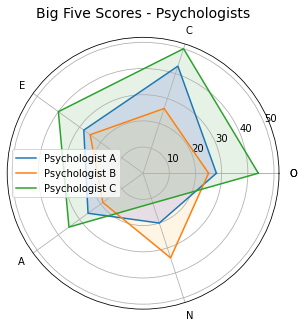

In [43]:
categories = ['O', 'C', 'E', 'A', 'N']
categories = [*categories, categories[0]]

ps1 = [28, 43, 28, 26, 20] # MARILIA
ps2 = [25, 26, 25, 19, 34] # MILENA
ps3 = [44, 50, 40, 35, 12] # MIRIAM
ps1 = [*ps1, ps1[0]]
ps2 = [*ps2, ps2[0]]
ps3 = [*ps3, ps3[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(ps1))

plt.figure(figsize=(5, 5))

ax = plt.subplot(111, polar=True)

plt.subplot(polar=True)
plt.plot(label_loc, ps1, label='Psychologist A')
ax.fill(label_loc, ps1, 'blue', alpha=0.1)
plt.plot(label_loc, ps2, label='Psychologist B')
ax.fill(label_loc, ps2, 'orange', alpha=0.1)
plt.plot(label_loc, ps3, label='Psychologist C')
ax.fill(label_loc, ps3, 'green', alpha=0.1)

plt.title('Big Five Scores - Psychologists', size=14, y=1.05)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc = 'center left')
plt.show()